# Model Evolution & Comparative Analysis

## Introduction

In this project, we aim to perform a **comparative study** of several predictive modeling techniques ranging from simple linear models to more complex ensemble methods. The objective is not just to evaluate their predictive performance but also to **observe how the nature of prediction evolves** as we move from one model type to another. We also explore how model interpretability, complexity, overfitting tendencies, and feature importance change across models.

The models considered for this comparative study are:

* **Ordinary Least Squares (OLS)**
* **Bayesian Linear Regression**
* **Ridge Regression**
* **Lasso Regression**
* **Bayesian Linear Regression**
* **Decision Tree Regressor**
* **Random Forest Regressor**
* **XGBoost Regressor**

We further explore the effect of **feature reduction** and the inclusion of **interaction terms** to check if the model performance and complexity can be optimized.

---

## Objective

1. Fit and evaluate each model on the same dataset.
2. Visualize key diagnostic or characteristic plots for each model.
3. Understand and highlight the strengths, limitations, and ideal use-cases of each model.
4. Explore how model predictions evolve from simple to complex architectures.
5. Optionally compare custom implementations with scikit-learn or inbuilt library versions.
6. Investigate feature selection and interaction effects on performance and generalization.

---

## Dataset Overview

* **Dataset Name**: NHANES (National Health and Nutrition Examination Survey) - USA
* **Number of Samples**: 6745
* **Number of Features**: 28 primary features (excluding SEQN/IDs and intermediate engineered features)
* **Target Variable**: `BMXBMI` (Body Mass Index)
* **Key Features Used**:

  * Demographics: `RIAGENDR`, `RIDAGEYR`, `RIDRETH1`, `DMDCITZN`, `DMDEDUC2`, `DMDMARTL`
  * Socioeconomic: `DMDHHSIZ`, `WTINT2YR`, `SDMVPSU`, `SDMVSTRA`, `INDFMPIR`
  * Alcohol Use: `ALQ101`, `ALQ110`, `ALQ130`
  * Smoking: `SMQ020`
  * Blood Pressure: `BPXSY1`, `BPXSY2`, `BPXDI1`, `BPXDI2`
  * Anthropometric: `BMXWT`, `BMXHT`, `BMXBMI`, `BMXLEG`, `BMXARML`, `BMXARMC`, `BMXWAIST`
* **Preprocessing Done**: Handling missing values, standardization, categorical encoding, train-test splitting, optional feature engineering (interaction terms)

---

## Environment Setup

Specify the libraries and environment details used to build and evaluate models:

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
```

Add any other relevant packages for Bayesian models, XGBoost, etc.

---

## Coming Up Next

We'll start with:

* Model 1: **OLS Regression** — baseline model, interpretable, fast
* Then evolve toward:

  * Ridge and Lasso (Regularization insight)
  * Bayesian Linear Regression (Uncertainty + probabilistic perspective)
  * Decision Tree (Non-linearity and interpretability)
  * Random Forest (Ensemble wisdom)
  * XGBoost (Boosted performance)

Each section will include:

* **Model summary**
* **Prediction plot / Feature importance / Coefficient paths**
* **Pros and Cons**
* **Comparison table snapshot**


# Data Cleaning and Environment Setup

Before proceeding with any data analysis or modeling, the required libraries for data handling, visualization, and machine learning were imported. This includes standard libraries like NumPy, Pandas, Matplotlib, Seaborn, and Scikit-learn. In addition, specialized tools for statistical modeling and optimization, such as Scipy and custom modules like `cleaning_module` and `all_model`, were also included.

## Data Loading and Cleaning

The NHANES dataset was loaded using a CSV file. To handle missing values, a cleaning function `clean_data` from the custom module was used with the method set to fill missing values using the column-wise mean.

## Initial Data Inspection

Once the dataset was cleaned, a preview of the first few rows was printed to verify that the cleaning was successful. Additionally, the structure and data types of the dataset were displayed using an info summary.

## Dropping Irrelevant Columns

At this stage, a check was made to identify any columns that were unnecessary or irrelevant to the analysis. Though no columns were dropped in the current version, the code includes a placeholder for this step.

## Final Check

Lastly, the column names of the dataset were printed again to ensure the data was in the desired shape and ready for further preprocessing, feature engineering, and modeling.

With this, the dataset was prepared and ready to be used in model training and evaluation.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from cleaning_module  import  *
from all_model import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, roc_auc_score, roc_curve, auc
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import seaborn as sns
from sklearn.metrics import roc_curve, auc
from scipy.stats import multivariate_normal, bernoulli
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore', category=RuntimeWarning)
from sklearn.linear_model import BayesianRidge



data_name = 'NHANES.csv'
data = clean_data(data_name, method= 'fill_mean' )
print('-------------------------------------------------------------------')
print(data.head(5))
print('\n-------------------------------------------------------------------\n')

print(data.info())

# Dropping Station column from dataset because it is not useful in data
data = data.drop(columns=[])

print(data.info())

print('\n------------------------------------------------------------------\n')
print(data.columns)
data.head()

Data loaded successfully.
Duplicates removed: 0
Missing values filled with mean.
Cleaned data saved to cleaned_data.csv
SEQN        0
ALQ101      0
ALQ110      0
ALQ130      0
SMQ020      0
RIAGENDR    0
RIDAGEYR    0
RIDRETH1    0
DMDCITZN    0
DMDEDUC2    0
DMDMARTL    0
DMDHHSIZ    0
WTINT2YR    0
SDMVPSU     0
SDMVSTRA    0
INDFMPIR    0
BPXSY1      0
BPXDI1      0
BPXSY2      0
BPXDI2      0
BMXWT       0
BMXHT       0
BMXBMI      0
BMXLEG      0
BMXARML     0
BMXARMC     0
BMXWAIST    0
HIQ210      0
dtype: int64
-------------------------------------------------------------------
    SEQN  ALQ101    ALQ110    ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0  83732     1.0  1.587522  1.000000       1         1        62         3   
1  83733     1.0  1.587522  6.000000       1         1        53         3   
2  83734     1.0  1.587522  3.911512       1         1        78         3   
3  83735     2.0  1.000000  1.000000       2         2        56         3   
4  83736     2.0 

SEQN  ALQ101    ALQ110    ALQ130  SMQ020  RIAGENDR  RIDAGEYR  RIDRETH1  \
0  83732     1.0  1.587522  1.000000       1         1        62         3   
1  83733     1.0  1.587522  6.000000       1         1        53         3   
2  83734     1.0  1.587522  3.911512       1         1        78         3   
3  83735     2.0  1.000000  1.000000       2         2        56         3   
4  83736     2.0  1.000000  1.000000       2         2        42         4   

   DMDCITZN  DMDEDUC2  ...  BPXSY2  BPXDI2  BMXWT  BMXHT  BMXBMI  BMXLEG  \
0       1.0       5.0  ...   124.0    64.0   94.8  184.5    27.8    43.3   
1       2.0       3.0  ...   140.0    88.0   90.4  171.4    30.8    38.0   
2       1.0       3.0  ...   132.0    44.0   83.4  170.1    28.8    35.6   
3       1.0       5.0  ...   134.0    68.0  109.8  160.9    42.4    38.5   
4       1.0       4.0  ...   114.0    54.0   55.2  164.9    20.3    37.4   

   BMXARML  BMXARMC  BMXWAIST    HIQ210  
0     43.6     35.9     101.1  2.000000  
1     40.0     33.2     107.9  1.915469  
2     37.0     31.0     116.5  2.000000  
3     37.7     38.3     110.1  2.000000  
4     36.0     27.2      80.4  2.000000  

[5 rows x 28 columns]

# Feature Selection and Data Splitting

## Feature Identification

After loading and cleaning the dataset, a subset of relevant features was selected from the NHANES dataset. These features span multiple categories:

* **Demographic**: Gender, Age, Ethnicity, Citizenship, Education, Marital Status
* **Socioeconomic**: Household size, Interview weight, Survey design variables, Income ratio
* **Health Indicators**: Blood pressure readings, Anthropometric measurements (height, weight, arm and leg length, waist, etc.)
* **Substance Use**: Alcohol and smoking related responses

This careful selection ensures that the predictors used have potential influence on the target variable — BMI (`BMXBMI`).

## Feature-Target Setup

The predictor matrix `X` was created using the selected features, while the target variable `y` was set to be BMI (`BMXBMI`).

## Exploratory Analysis

To better understand the relationship between features and the target variable, a custom function `data_plot` was used. This likely includes visualizations such as scatter plots or correlation maps to illustrate how each input feature interacts with the target.

## Data Splitting

The dataset was then split into training and testing sets using an 80-20 ratio. This ensures that models are trained on a majority of the data while preserving a separate subset for evaluating generalization performance.

* **Training Set**: 80% of the data
* **Test Set**: 20% of the data
* **Random State**: Fixed to ensure reproducibility

With the features selected and data split, the stage is now set for building and evaluating predictive models.


Index(['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXBMI', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'],
      dtype='object')
 Skewness & Kurtosis of features:
SEQN                 | Skew: 0.02 | Kurtosis: -1.21


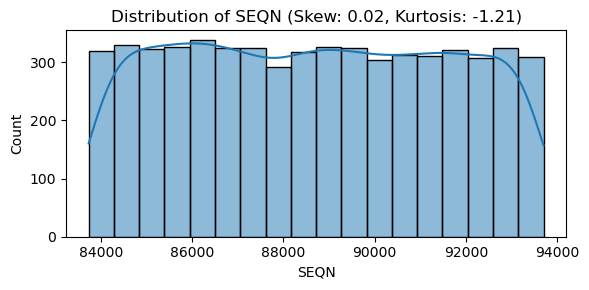

ALQ101               | Skew: 2.69 | Kurtosis: 31.75


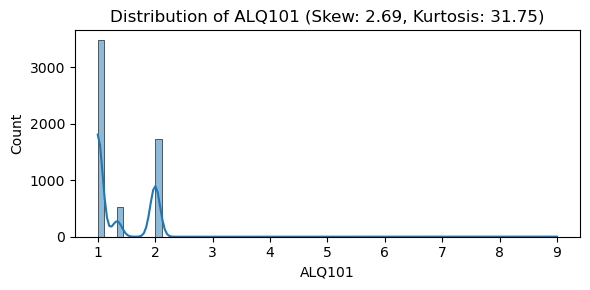

ALQ110               | Skew: 7.39 | Kurtosis: 162.02


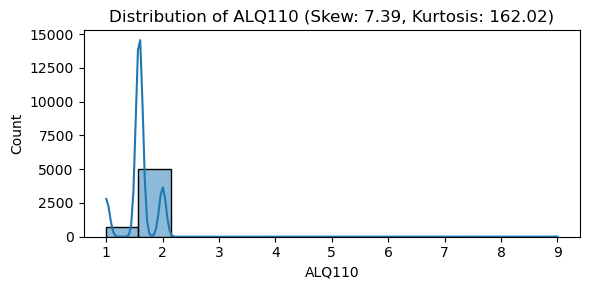

ALQ130               | Skew: 37.54 | Kurtosis: 1414.19


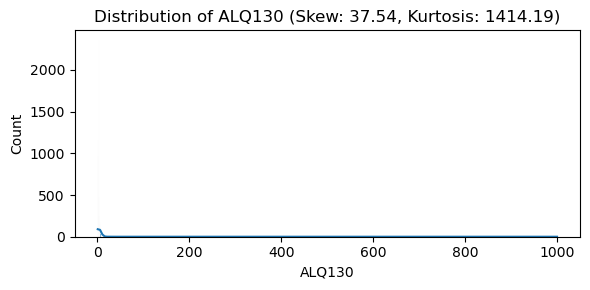

SMQ020               | Skew: 3.01 | Kurtosis: 39.35


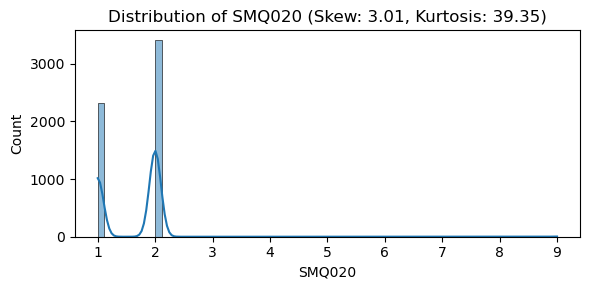

RIAGENDR             | Skew: -0.08 | Kurtosis: -1.99


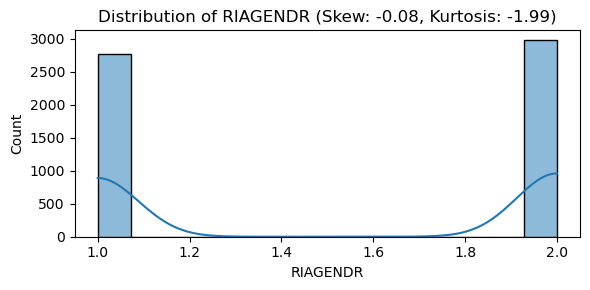

RIDAGEYR             | Skew: 0.10 | Kurtosis: -1.13


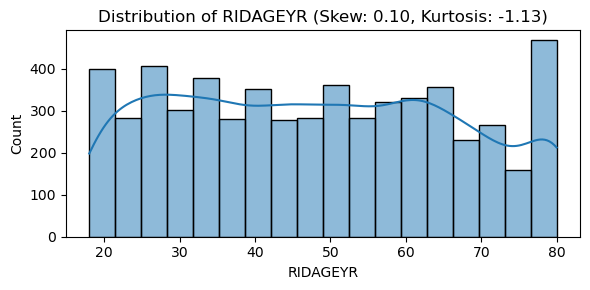

RIDRETH1             | Skew: -0.13 | Kurtosis: -0.97


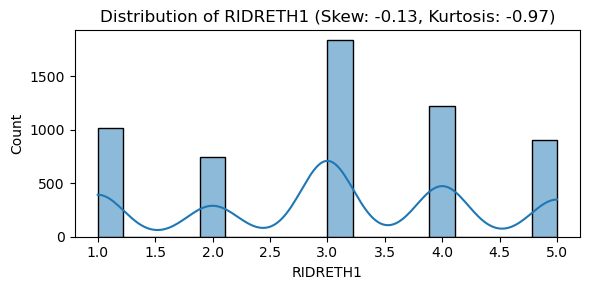

DMDCITZN             | Skew: 6.54 | Kurtosis: 81.28


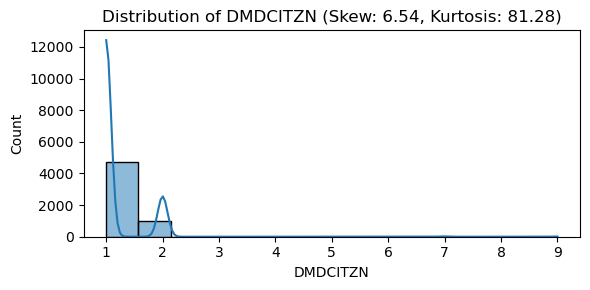

DMDEDUC2             | Skew: -0.47 | Kurtosis: -0.58


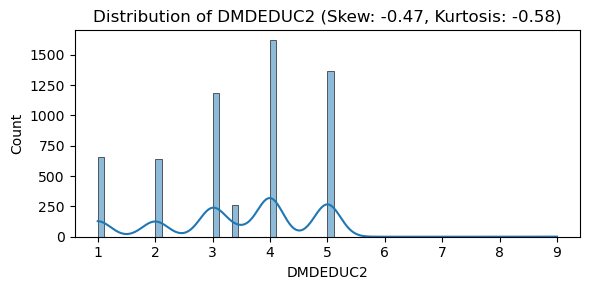

DMDMARTL             | Skew: 11.92 | Kurtosis: 371.07


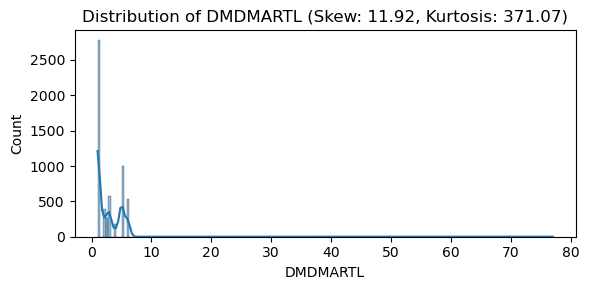

DMDHHSIZ             | Skew: 0.54 | Kurtosis: -0.64


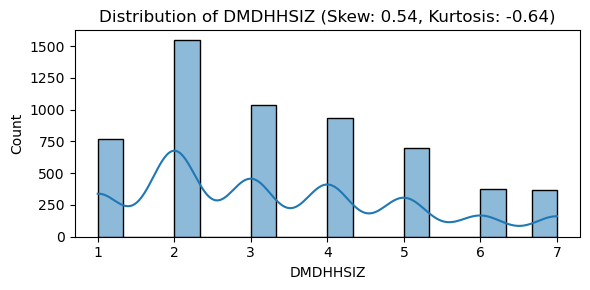

WTINT2YR             | Skew: 1.89 | Kurtosis: 2.90


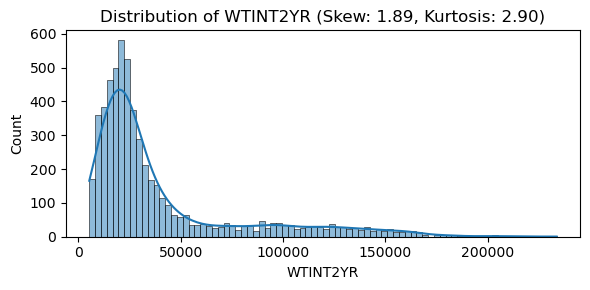

SDMVPSU              | Skew: 0.05 | Kurtosis: -2.00


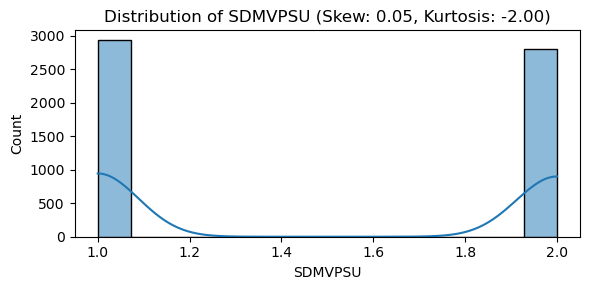

SDMVSTRA             | Skew: -0.06 | Kurtosis: -1.20


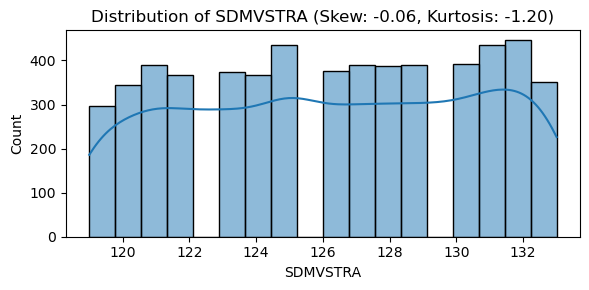

INDFMPIR             | Skew: 0.47 | Kurtosis: -0.93


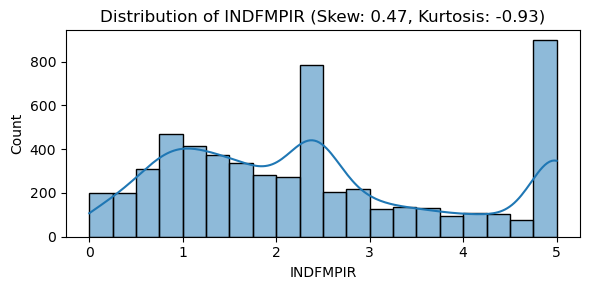

BPXSY1               | Skew: 1.07 | Kurtosis: 2.22


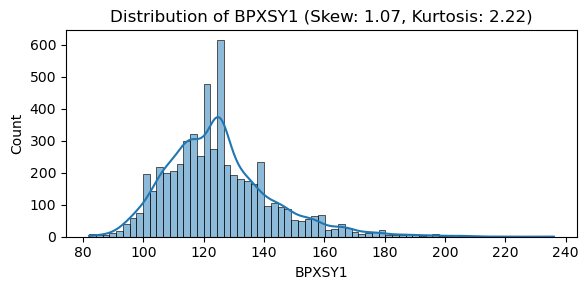

BPXDI1               | Skew: -0.64 | Kurtosis: 4.12


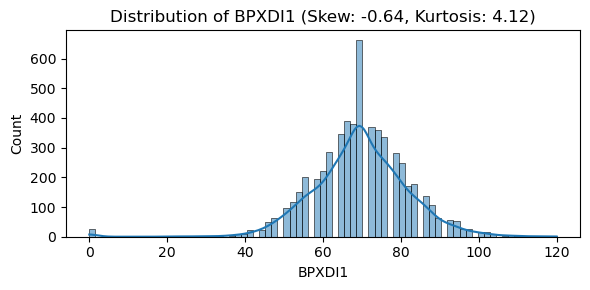

BPXSY2               | Skew: 1.06 | Kurtosis: 2.12


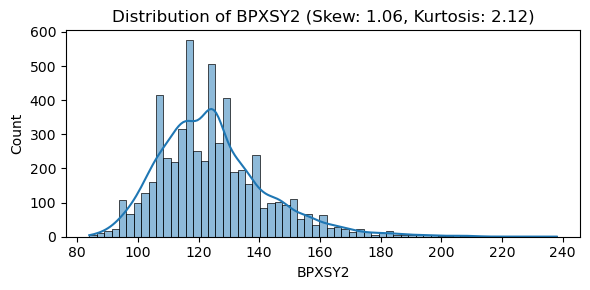

BPXDI2               | Skew: -0.67 | Kurtosis: 4.69


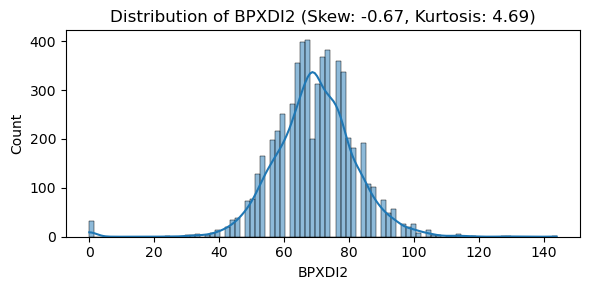

BMXWT                | Skew: 1.02 | Kurtosis: 1.67


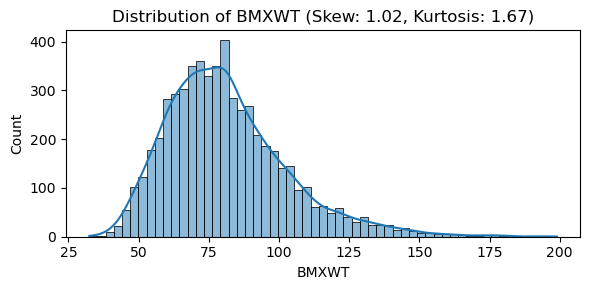

BMXHT                | Skew: 0.08 | Kurtosis: -0.41


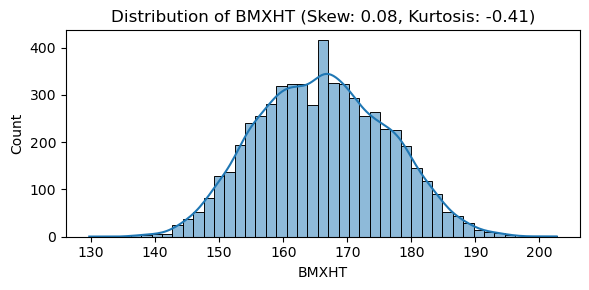

BMXLEG               | Skew: -0.03 | Kurtosis: 0.02


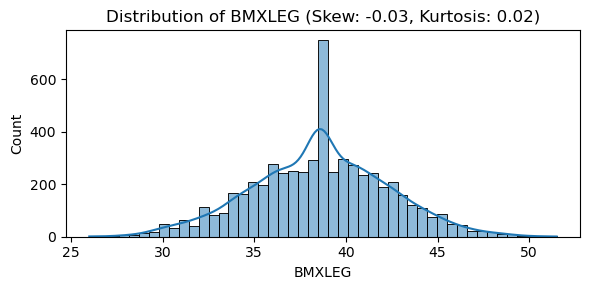

BMXARML              | Skew: 0.07 | Kurtosis: -0.09


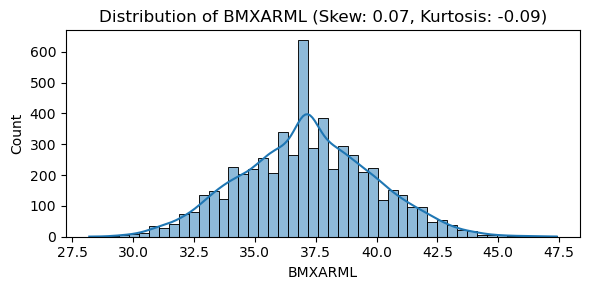

BMXARMC              | Skew: 0.53 | Kurtosis: 0.64


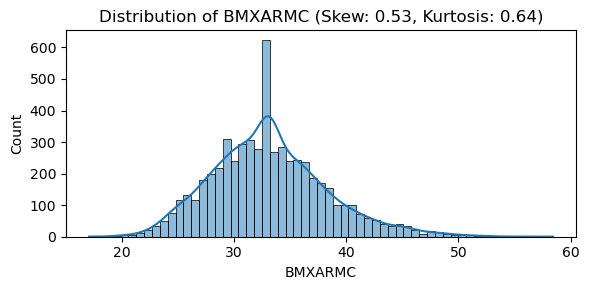

BMXWAIST             | Skew: 0.61 | Kurtosis: 0.69


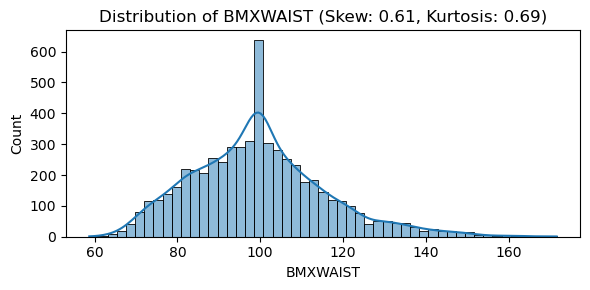

HIQ210               | Skew: 8.14 | Kurtosis: 174.12


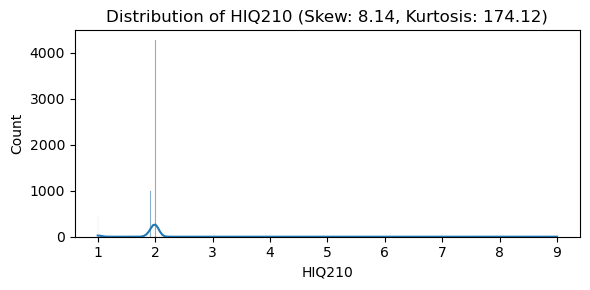


 Relationship with Target (charges):


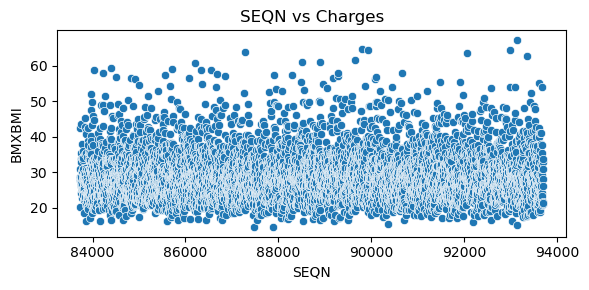

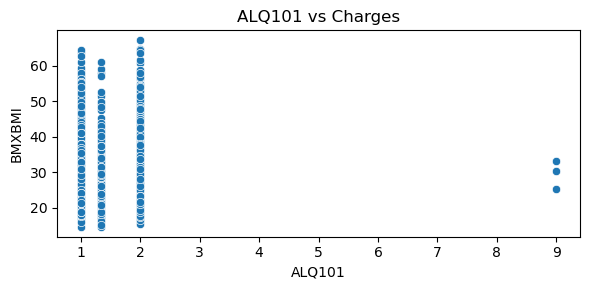

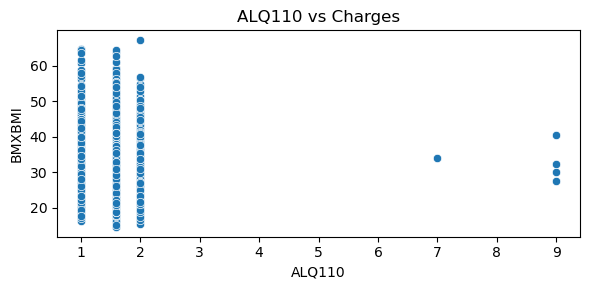

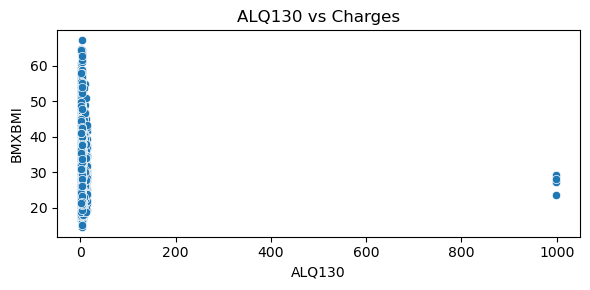

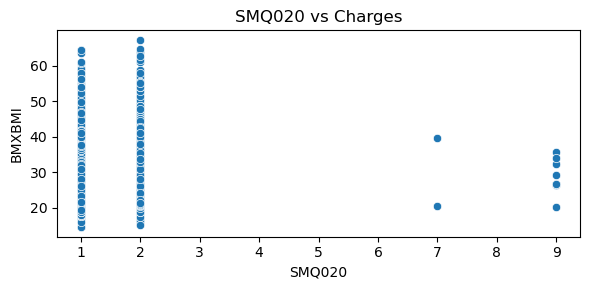

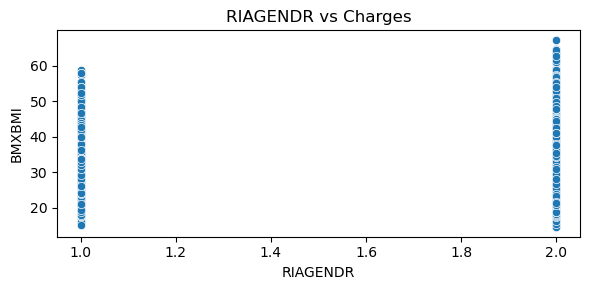

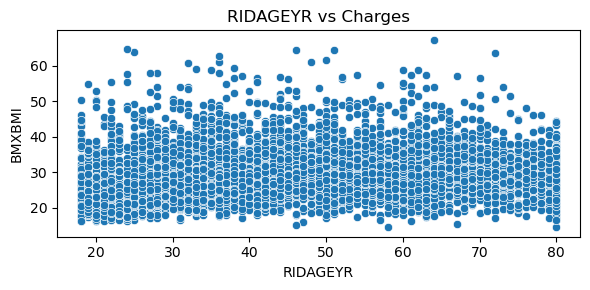

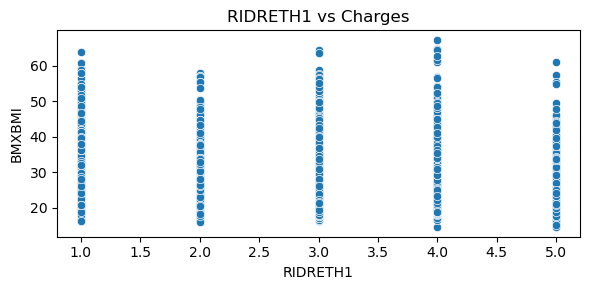

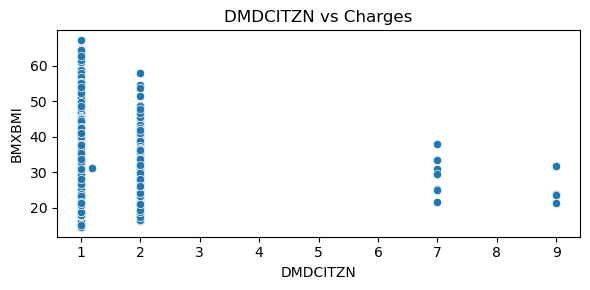

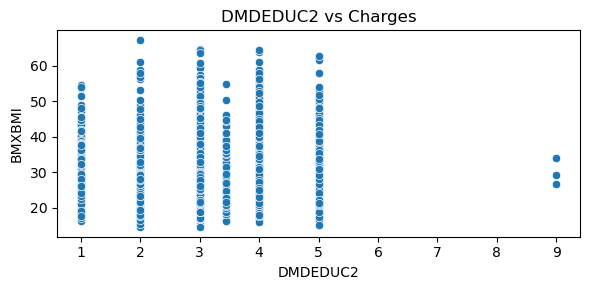

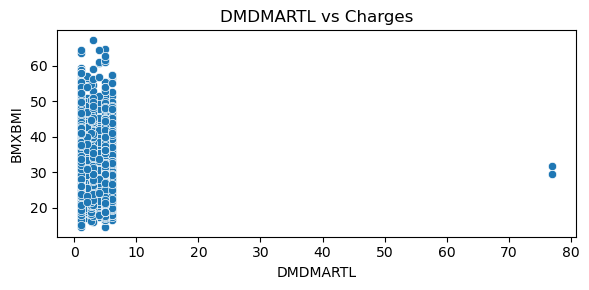

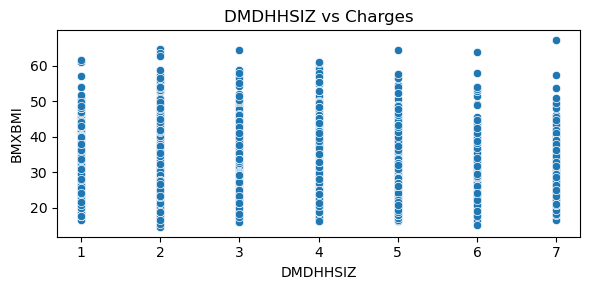

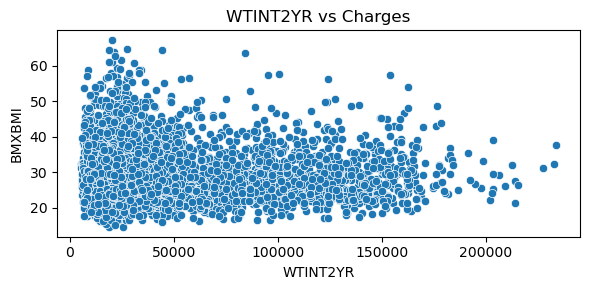

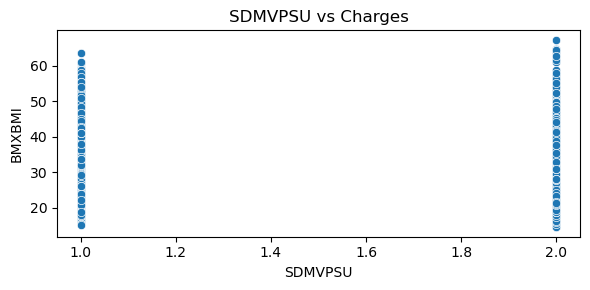

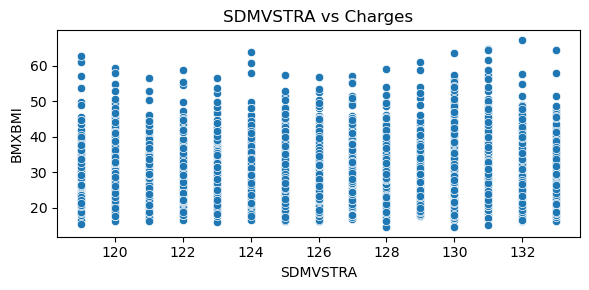

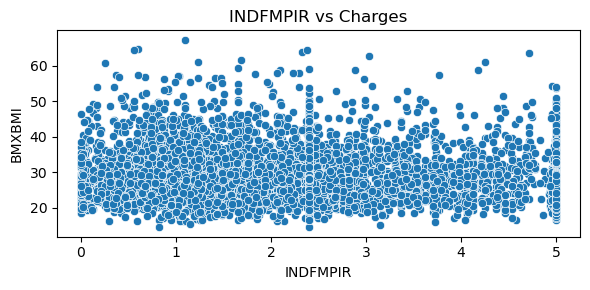

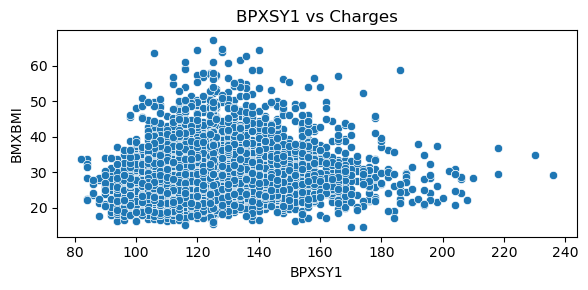

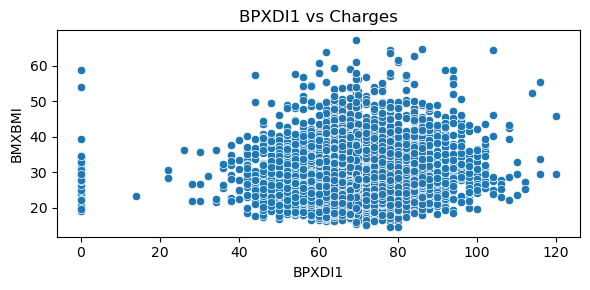

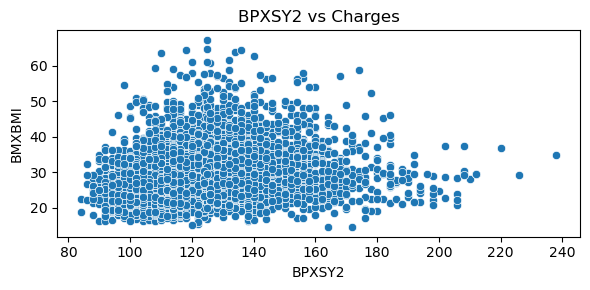

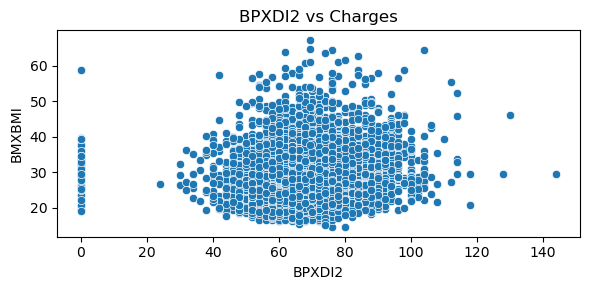

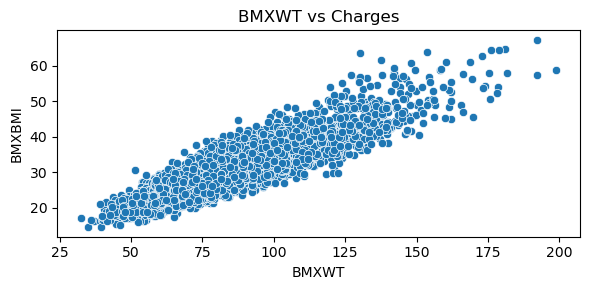

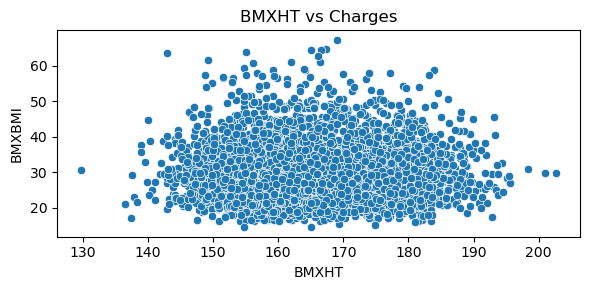

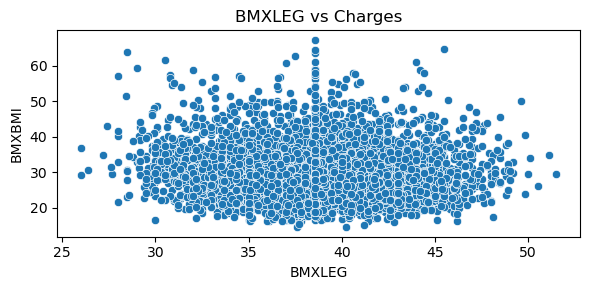

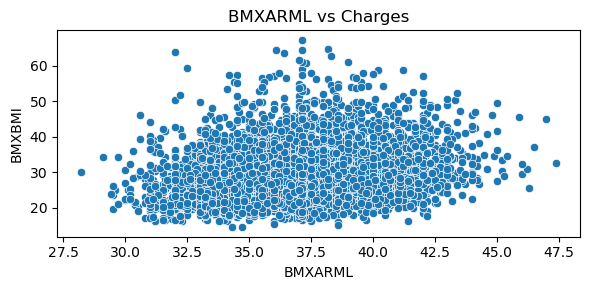

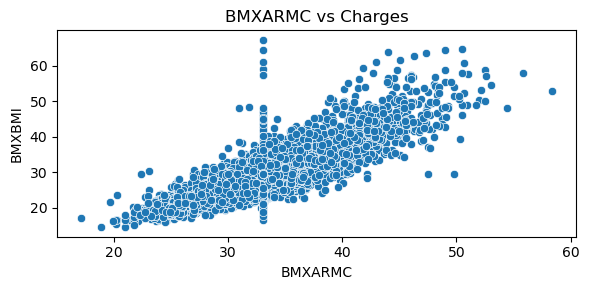

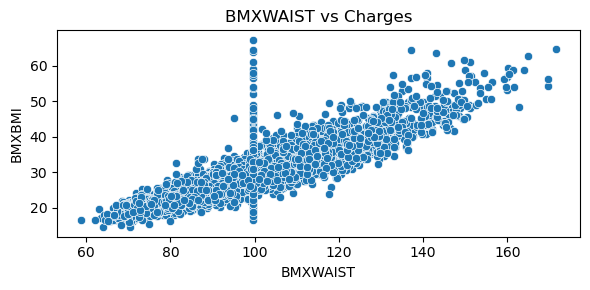

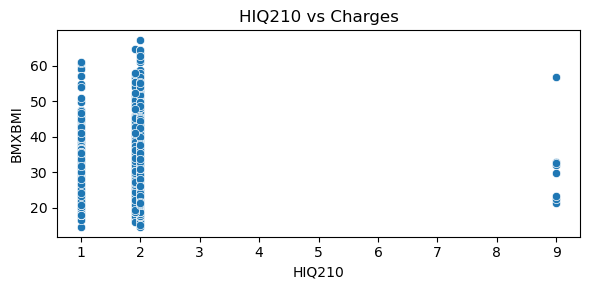

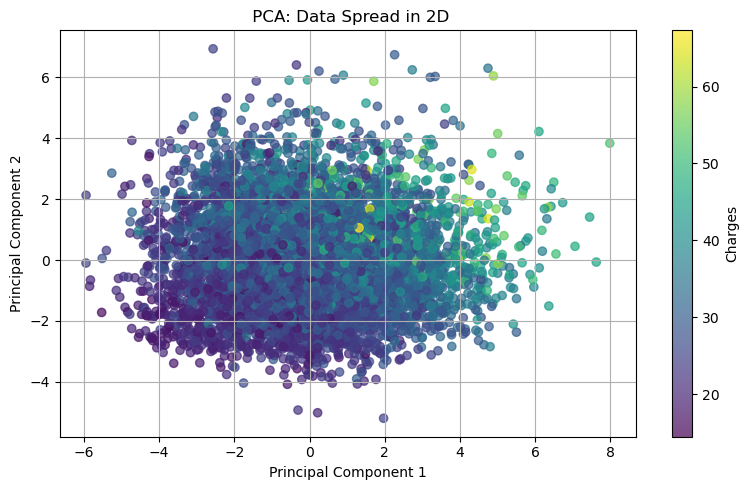

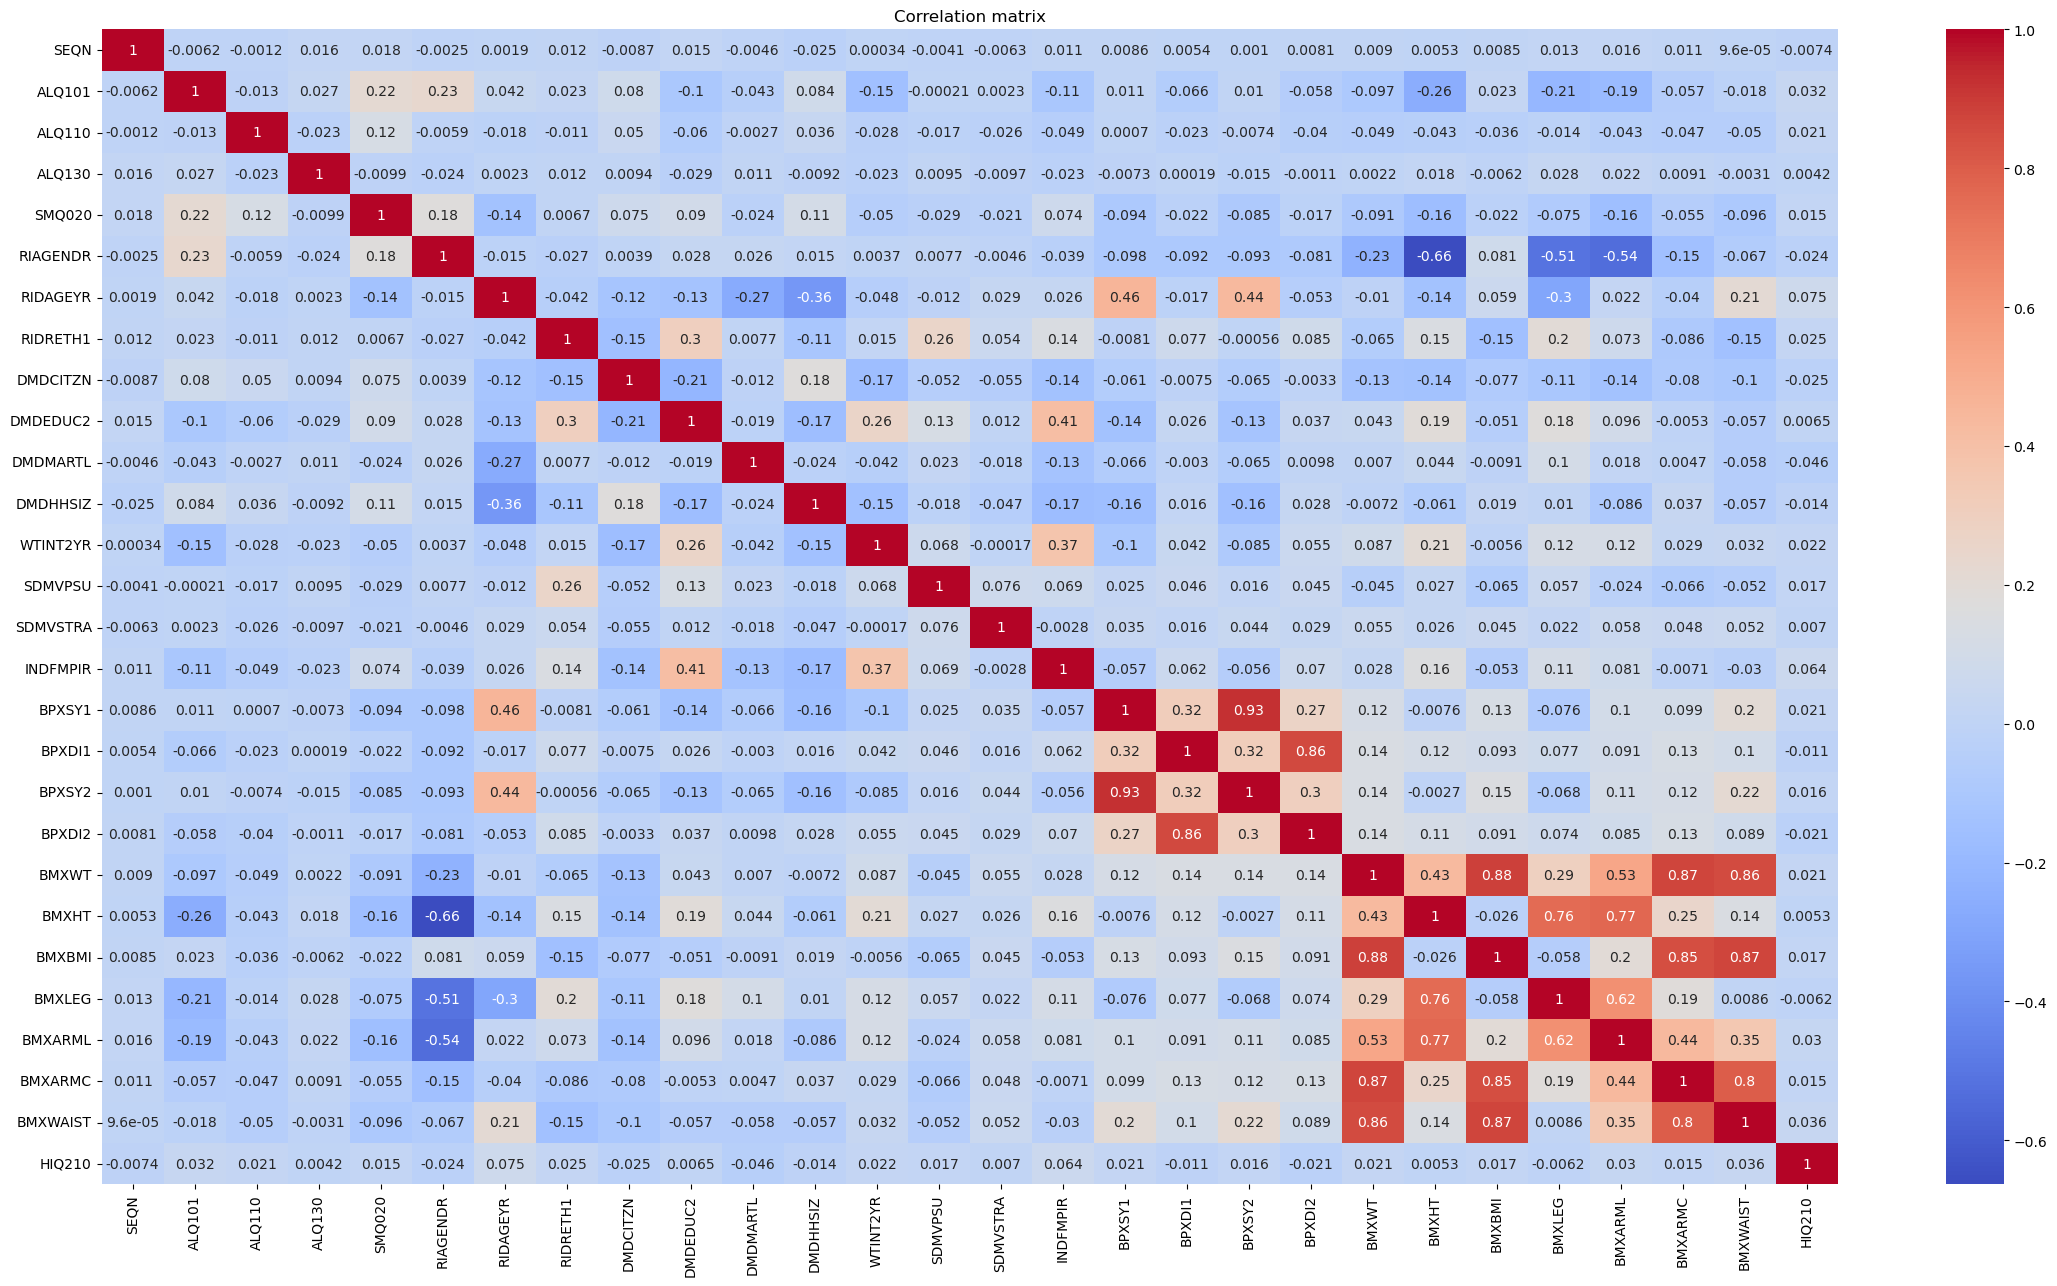

In [2]:
print(data.columns)
# Step 1: Base features
selected_features = ['SEQN', 'ALQ101', 'ALQ110', 'ALQ130', 'SMQ020', 'RIAGENDR', 'RIDAGEYR',
       'RIDRETH1', 'DMDCITZN', 'DMDEDUC2', 'DMDMARTL', 'DMDHHSIZ', 'WTINT2YR',
       'SDMVPSU', 'SDMVSTRA', 'INDFMPIR', 'BPXSY1', 'BPXDI1', 'BPXSY2',
       'BPXDI2', 'BMXWT', 'BMXHT', 'BMXLEG', 'BMXARML', 'BMXARMC',
       'BMXWAIST', 'HIQ210'] 


X= data[selected_features]


# Step 4: Target
y = data[ 'BMXBMI']

# relational plot between features and target variables
data_plot(data, X, y)

X= data[selected_features].values
y = data[ 'BMXBMI'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



# Ordinary Least Squares (OLS) Regression

## Model Overview

Ordinary Least Squares (OLS) regression is the most fundamental and interpretable regression technique. It models the relationship between a dependent variable and one or more independent variables by minimizing the sum of the squared differences between the observed and predicted values.

In this project, OLS serves as the **baseline model** — giving us a starting point to compare more advanced models later. Despite its simplicity, OLS often performs reasonably well when assumptions such as linearity and homoscedasticity hold.

## Assumptions of OLS

Before interpreting the results, it's important to recall that OLS relies on certain assumptions:

* Linearity of the relationship between independent and dependent variables
* Independence of errors
* Homoscedasticity (equal variance of errors)
* Normal distribution of residuals
* No multicollinearity among predictors

Violations of these assumptions can impact model performance and inference.

## Model Fitting

The OLS model was fitted using the training data. The regression coefficients were estimated to best fit the observed BMI values from the selected input features.

## Model Evaluation

Once trained, the OLS model was evaluated on both the training and test sets. The performance metrics used include:

* **Mean Squared Error (MSE)**: Measures average squared difference between predicted and actual values
* **R-squared (R²)**: Indicates proportion of variance in the target variable explained by the features

These metrics help understand how well the linear model fits the data and how it generalizes to unseen samples.

## Visualization

To better understand the model's behavior, various plots were generated:

* **Actual vs. Predicted BMI**: Shows how closely predictions align with actual values
* **Residual Plot**: Helps check for patterns in errors, indicating potential issues with assumptions

## Insights

* OLS gives an interpretable set of coefficients showing direction and strength of each feature’s relationship with BMI
* Model performs reasonably well but may struggle with non-linearity or feature interactions
* Serves as a solid benchmark to evaluate gains from regularization and ensemble methods

With this baseline model in place, we now move to Ridge and Lasso Regression to handle potential multicollinearity and overfitting.



--- Train Evaluation ---


Residual Standard Error (RSE): 0.872999218353103
R-squared: 0.984881875453039
Correlation between actual and predicted: 0.9924121499926525
R-squared vs. Correlation squared: 0.984881875453039 vs 0.984881875453039
H1: F-statistic = 11002.396832714589 → likely significant.

--- Test Evaluation ---
Residual Standard Error (RSE): 0.8488027307266637
R-squared: 0.9853860664186838
Correlation between actual and predicted: 0.9926924306019258
R-squared vs. Correlation squared: 0.9853860664186838 vs 0.9854382617743592


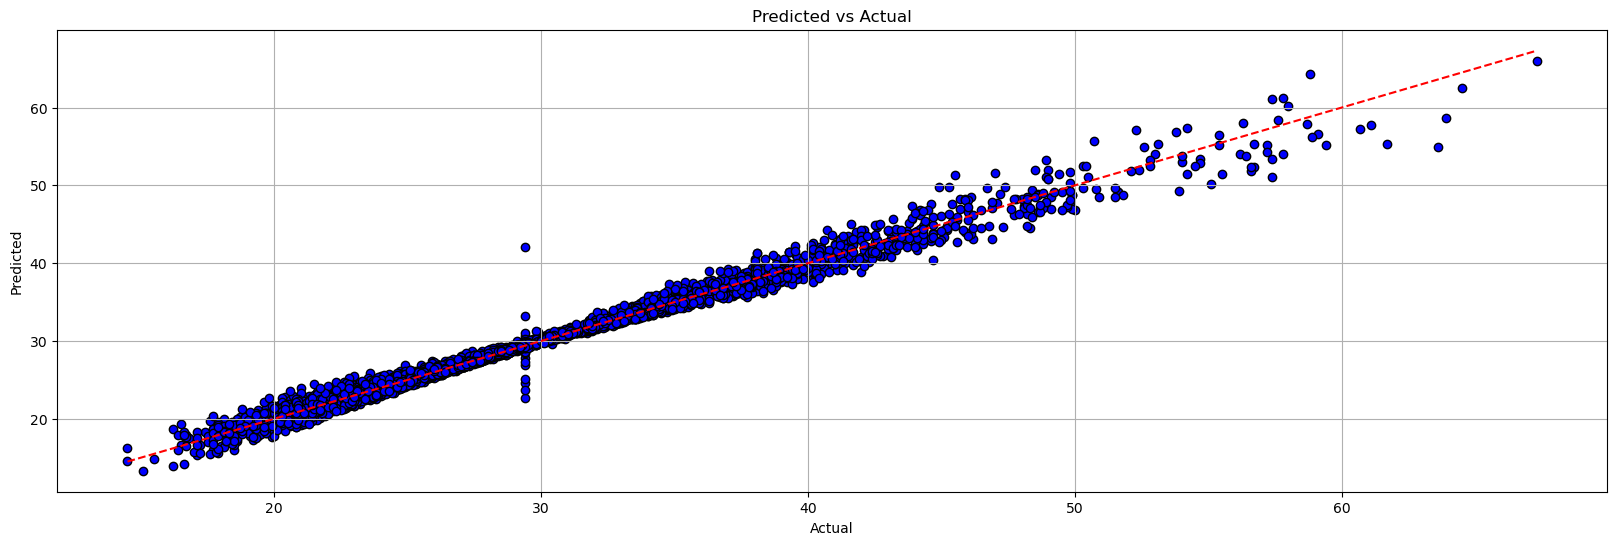

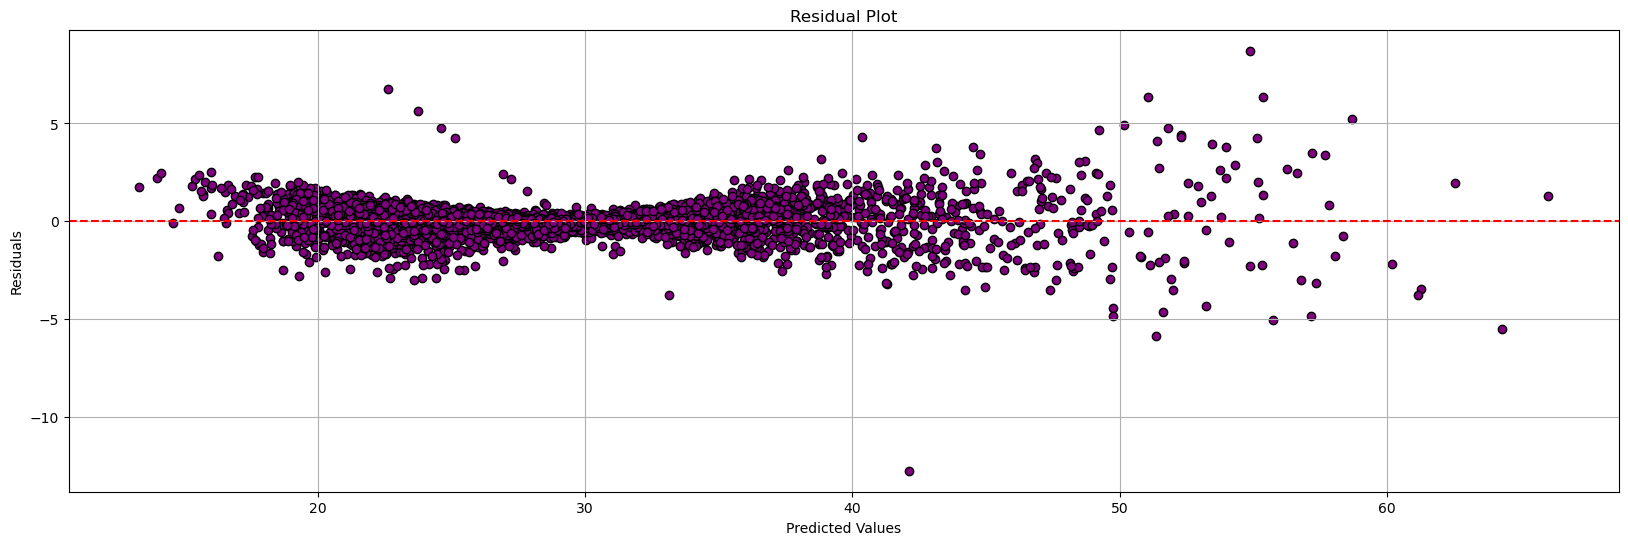

In [3]:
train_result = run_multiple_linear_regression(X_train, y_train,X_test, y_test, feature_names=selected_features)


# Bayesian Linear Regression

## Model Overview

Bayesian Linear Regression (BLR) extends classical linear regression by treating the model parameters as probability distributions rather than fixed values. This probabilistic framework allows the model to incorporate **prior beliefs** and quantify **uncertainty** in predictions.

Instead of estimating a single set of coefficients, BLR infers a **posterior distribution** over the model parameters using Bayes’ theorem:

$$
P(\beta \mid X, y) \propto P(y \mid X, \beta) \cdot P(\beta)
$$

Here,

* $P(\beta)$: Prior distribution over weights
* $P(y \mid X, \beta)$: Likelihood from observed data
* $P(\beta \mid X, y)$: Posterior distribution after observing data

This formulation captures model confidence and provides **predictive distributions** rather than just point estimates.

## Motivation for Using BLR

* Handles **small datasets** better due to prior regularization
* Naturally avoids overfitting by incorporating uncertainty
* Useful when **interpretability + uncertainty** are both desired
* Gives **confidence intervals** for predictions

## Model Implementation

The BLR model was implemented from scratch using probabilistic rules of Gaussian distributions. Prior and likelihood assumptions were Gaussian. The resulting posterior is also Gaussian due to conjugacy.

The key parameters:

* **Prior variance (********$\tau^2$****\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*)**: Reflects belief about parameter size before seeing data
* **Noise variance (********$\sigma^2$****\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*)**: Assumed constant variance in observations

The posterior mean and covariance were derived analytically and used for prediction.

## Prediction and Evaluation

After training, predictions were made using the posterior distribution:

* Posterior predictive mean: Used for point prediction
* Posterior predictive variance: Used to quantify uncertainty

Evaluation metrics:

* **Mean Squared Error (MSE)**
* **R-squared (R²)**
* Additionally, **confidence intervals** were visualized around predictions

## Visualization

* **Predicted vs. Actual plot**
* **Sampled based prediction and uncertainty**

## Insight

* BLR provides richer insights than OLS by showing where the model is more or less confident
* Performs comparably to OLS on average error, but with added uncertainty quantification
* Great for domains where **confidence in prediction** is critical (e.g., healthcare)

As we move forward, we explore **regularization-based models** like Ridge and Lasso to understand how shrinkage affects coefficient estimates.



--- Training Results (Bayesian Linear Regression) ---
Train MSE: 1.7079
Train R² : 0.9659


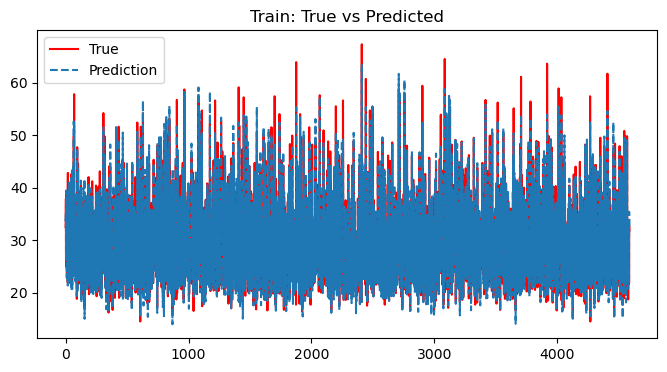


--- Testing Results (Bayesian Linear Regression) ---
Test MSE : 1.7099
Test R²  : 0.9644


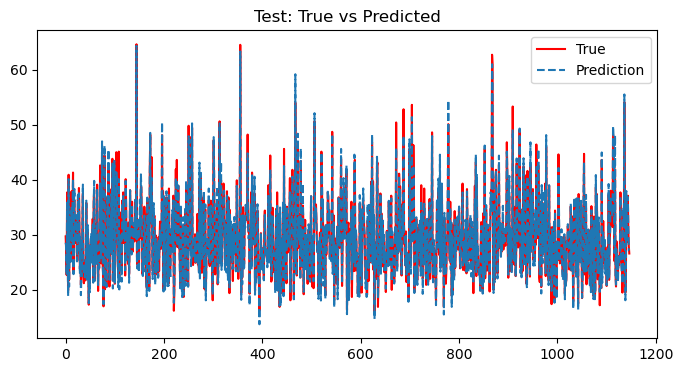

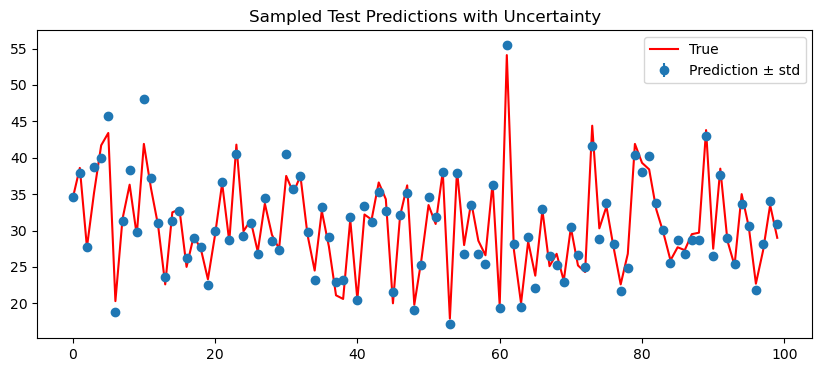

In [4]:
# 1. Train model
mu_post, Sigma_post = train_bayesian_linear_regression(X_train, y_train)
# 2. Evaluate on test data
test_bayesian_linear_regression(X_test, y_test, mu_post, Sigma_post)


# Ridge Regression

## Model Overview

Ridge Regression is a regularized version of OLS that adds an **L2 penalty** (squared magnitude of coefficients) to the loss function. This helps prevent overfitting, especially when features are highly correlated or when the number of features exceeds the number of observations.

The cost function minimized by Ridge is:

$$
\text{Loss} = \sum (y_i - \hat{y}_i)^2 + \lambda \sum \beta_j^2
$$

Where:

* $\lambda$ is the regularization parameter
* $\beta_j$ are the model coefficients

As $\lambda 	o 0$, Ridge becomes OLS. As $\lambda 	o \infty$, coefficients shrink closer to zero.

## Motivation for Using Ridge

* Reduces model variance and improves generalization
* Handles **multicollinearity** well by shrinking correlated coefficients
* Encourages smaller but non-zero coefficients (unlike Lasso)

## Model Implementation

The model was trained using various values of the regularization parameter $\lambda$. A hyperparameter tuning loop (e.g., using grid search or custom iteration) was used to analyze the effect of different levels of penalty.

A plot was generated to show how coefficient values change with different values of $\lambda$. This is known as the **regularization path**.

## Prediction and Evaluation

For the best $\lambda$, the Ridge model was used to make predictions on the test set. Performance was evaluated using:

* **Mean Squared Error (MSE)**
* **R-squared (R²)**

Comparison with OLS helps reveal if Ridge improved generalization or reduced overfitting.

## Visualization

* **Coefficient Regularization Path**: Shows how each coefficient evolves with increasing $\lambda$
* **Actual vs. Predicted Plot**: For visual inspection of prediction accuracy

## Insights

* Ridge regression typically improves generalization when overfitting is a concern
* Works well when many small/medium-sized effects contribute to the target
* Unlike Lasso, it doesn't produce sparse models, but it gives more **stable estimates**

Next, we explore **Lasso Regression**, which uses L1 regularization and can perform feature selection by shrinking some coefficients exactly to zero.


The best lambda is : 1000.0000
Final training MSE is : 2.9128

Train R^2 : 0.9419
Train MSE : 2.9128
Adjusted R^2 is : 0.9415
AIC is : 4959.1774
BIC is : 5132.8198
 Test R2: 0.9515
 Test MSE: 2.3339


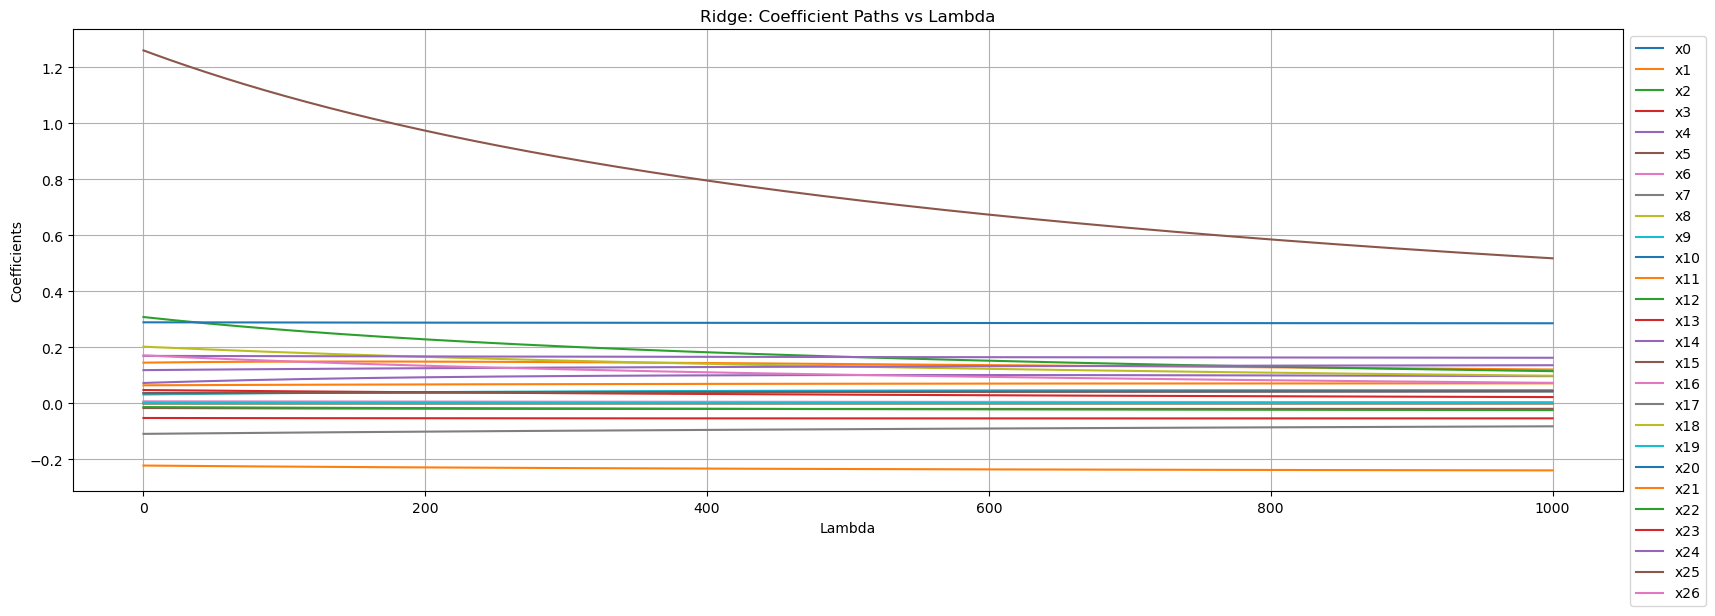

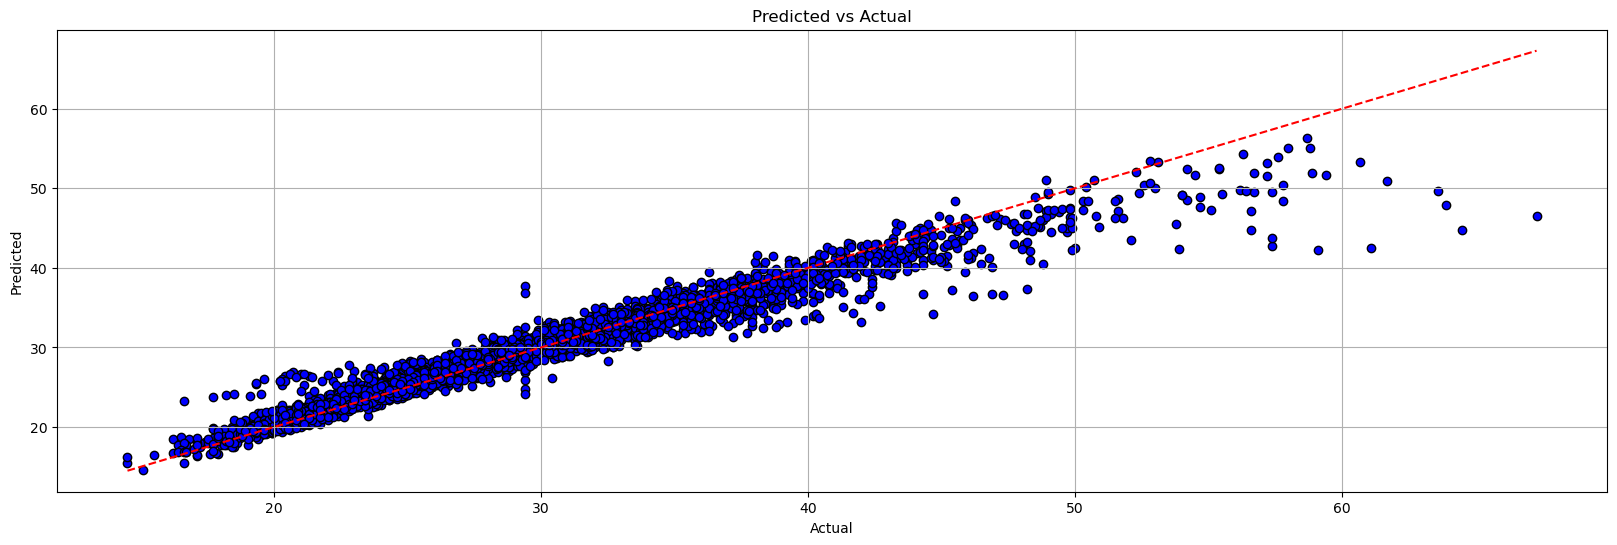

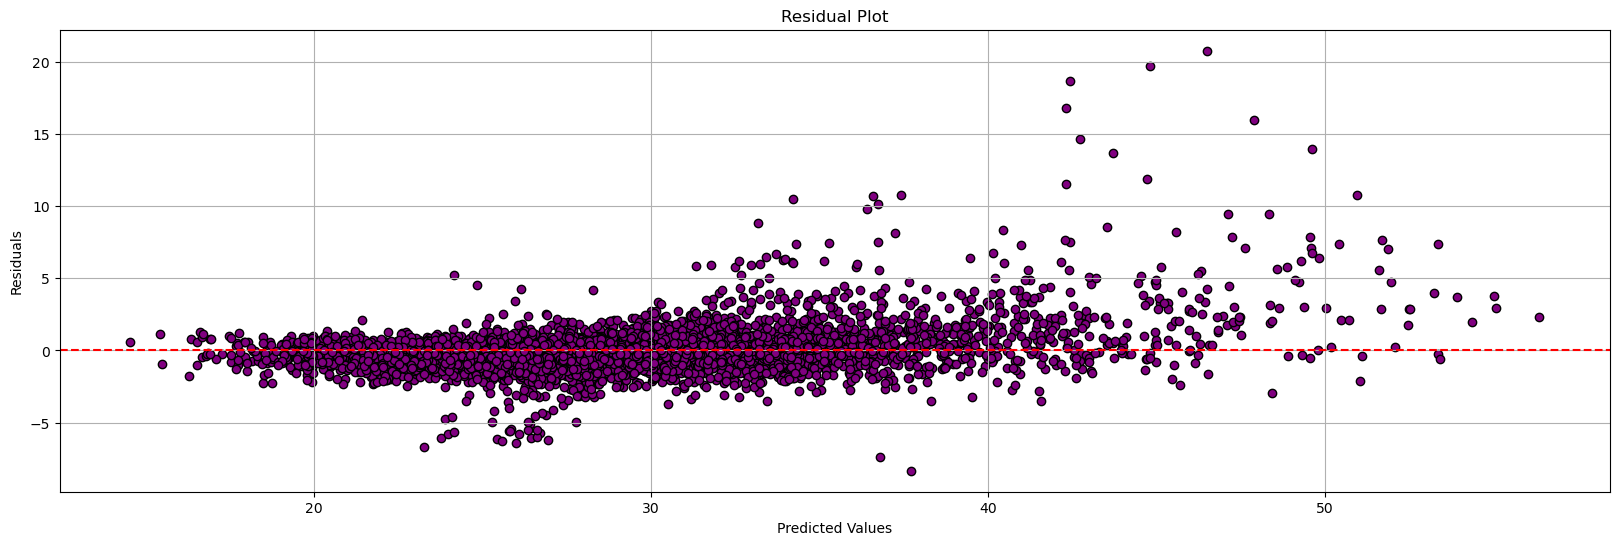

array([ 1.96357574e+01,  3.50706445e-06,  9.63779850e-02,  2.47064663e-02,
       -5.00791550e-04,  6.91090845e-02,  9.47040735e-01, -5.67300579e-03,
       -1.32445287e-01, -1.46726507e-01,  3.61048030e-03,  1.85469332e-02,
        1.64248343e-02, -1.98518436e-06, -5.61559041e-03,  3.82965137e-03,
       -4.51909348e-02, -9.58031397e-05, -1.09995860e-03,  4.29735761e-03,
        1.97446079e-03,  1.52398703e-01, -1.23515330e-01, -7.57032209e-02,
       -1.04751995e-01,  3.54844347e-01,  1.09154581e-01, -4.66605829e-02])

In [5]:
lembda=  np.logspace(-4,3, 9000) 
ridge_model(data ,X_train , y_train , X_test, y_test, lembda)

# Lasso Regression

## Model Overview

Lasso Regression (Least Absolute Shrinkage and Selection Operator) is a regularized version of linear regression that introduces an **L1 penalty** (absolute values of coefficients) into the loss function. Unlike Ridge, Lasso can shrink some coefficients **exactly to zero**, effectively performing **feature selection**.

The cost function minimized by Lasso is:

$$
\text{Loss} = \sum (y_i - \hat{y}_i)^2 + \lambda \sum |\beta_j|
$$

Where:

* $\lambda$: Regularization parameter controlling the strength of penalty
* $\beta_j$: Model coefficients

## Motivation for Using Lasso

* Automatically removes irrelevant or redundant features
* Produces simpler, **sparser models** that are easier to interpret
* Especially useful when dealing with **high-dimensional data**

## Model Implementation

Lasso was implemented by training the model across multiple values of the regularization parameter $\lambda$. The impact of regularization on coefficients was visualized using a **regularization path** plot.

Hyperparameter tuning was used to select the optimal $\lambda$ that balances bias and variance.

## Prediction and Evaluation

Predictions were made using the best model, and the performance was evaluated using:

* **Mean Squared Error (MSE)**
* **R-squared (R²)**

Lasso was compared with OLS and Ridge to see whether sparsity leads to better generalization.

## Visualization

* **Coefficient Regularization Path**: Highlights how some coefficients shrink to exactly zero
* **Predicted vs. Actual Plot**: Evaluates predictive accuracy

## Insights

* Lasso is effective for models where **only a few features are truly important**
* Outperforms OLS and Ridge when there is feature redundancy
* Feature selection leads to simpler, more interpretable models

Next, we shift from linear models to **nonlinear tree-based models** starting with **Decision Tree Regressor**.


Best Lambda Value: 0.0101

Lasso Results:
Train RSS: 3485.48
Test RSS: 801.97
Estimated Variance σ²: 0.76
Mallow's Cp: 0.77
AIC: 0.77
BIC: 0.80
Train MSE: 0.76
Test MSE: 0.70
RMSE: 0.87
R² train: 0.9848
R² test: 0.9855
Adjusted R²: 0.9847


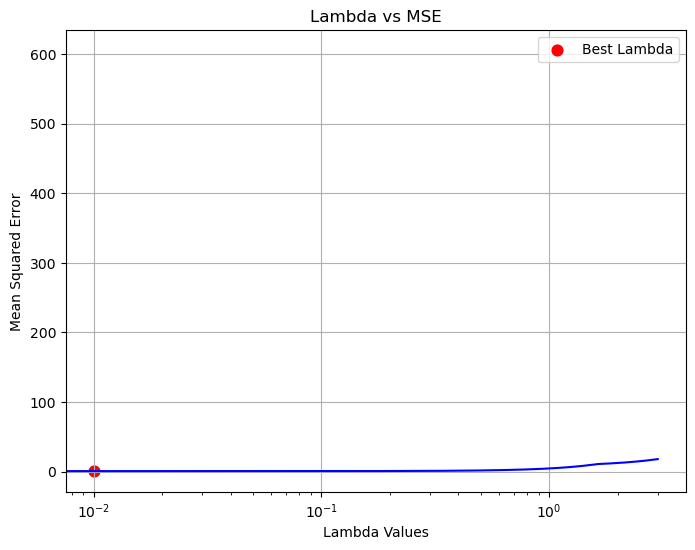

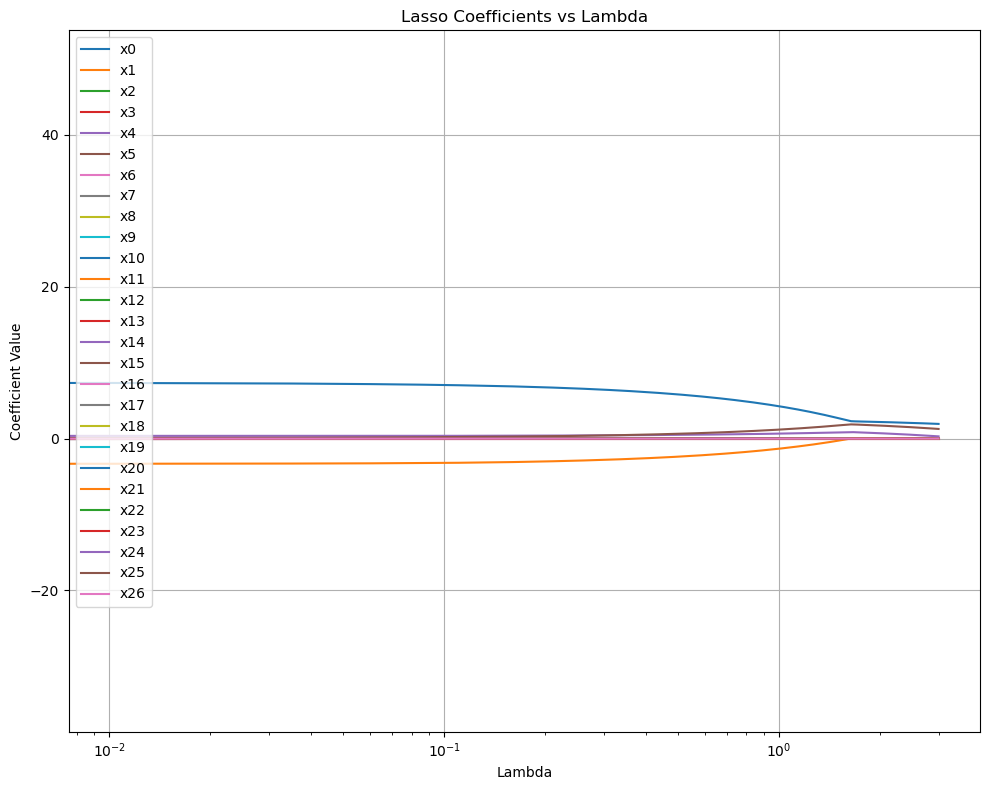

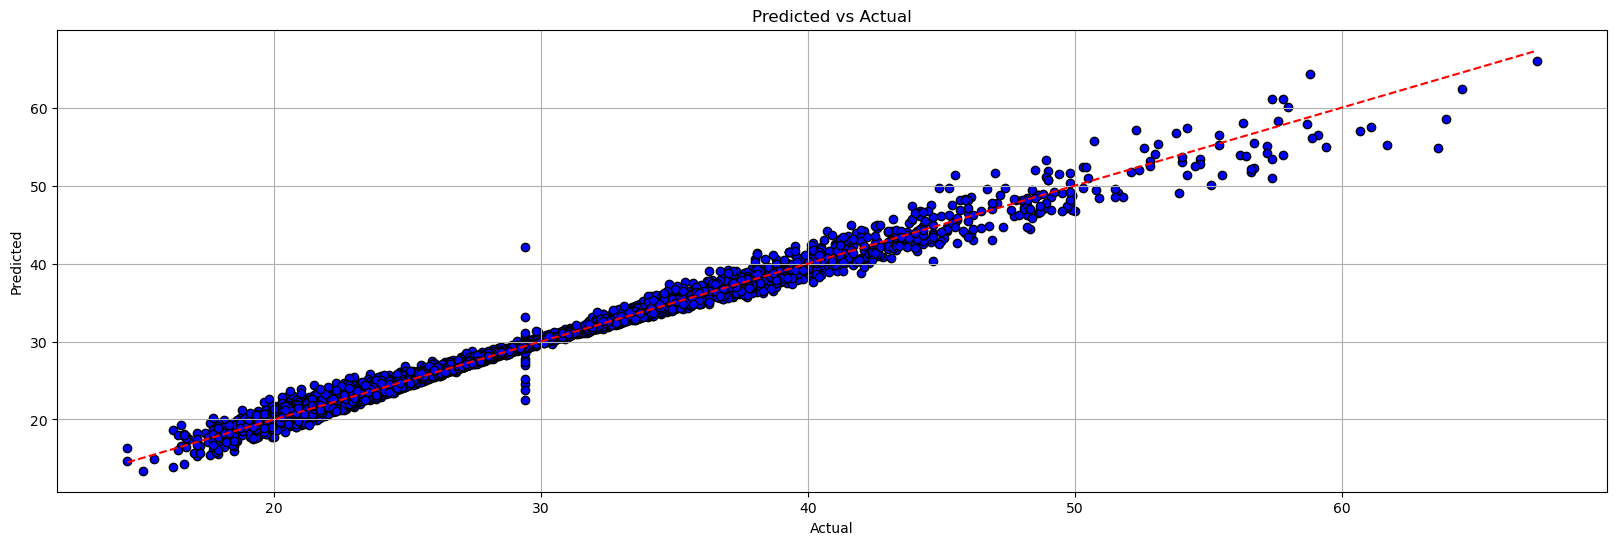

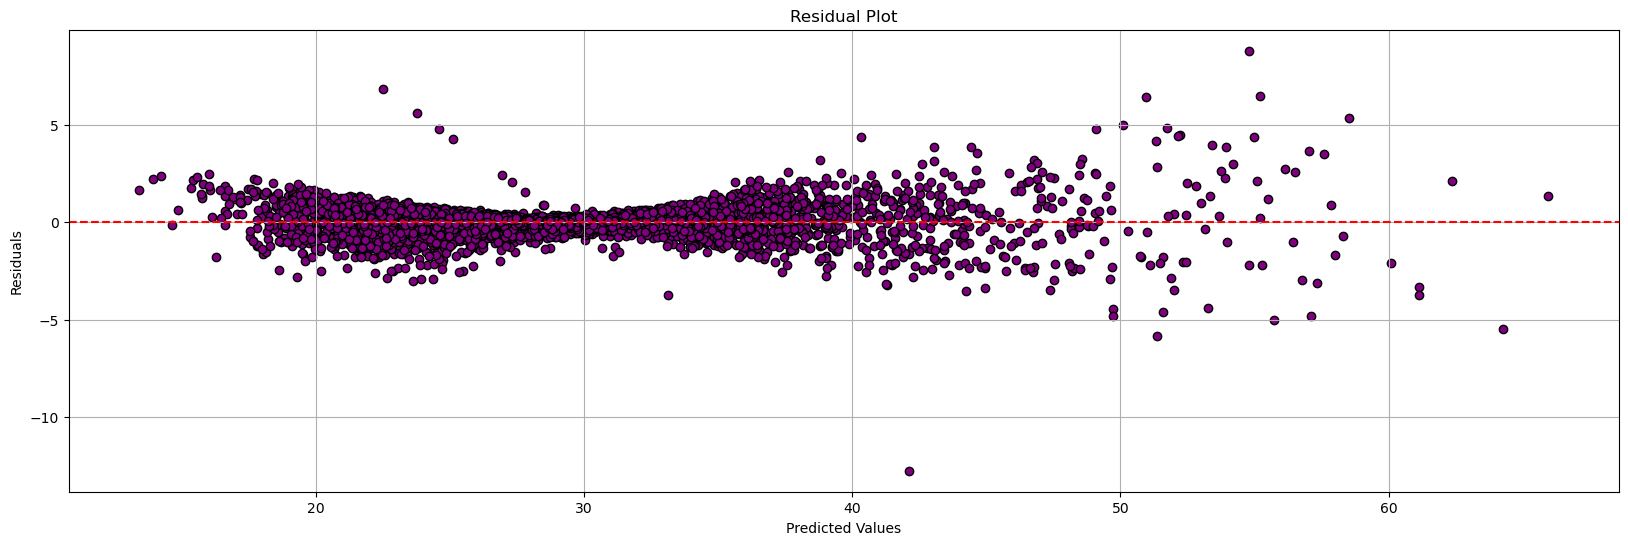

array([ 5.53482467e+01,  1.25139010e-06,  6.74575563e-03, -1.05660064e-02,
        0.00000000e+00, -6.75878450e-03,  1.11131545e-01,  0.00000000e+00,
       -5.13135478e-02, -2.16778707e-02,  5.31536940e-03,  9.76293961e-03,
       -1.68015593e-02,  0.00000000e+00,  0.00000000e+00, -1.67276518e-03,
       -2.27352651e-02, -7.46932909e-04, -7.52561459e-04,  0.00000000e+00,
        0.00000000e+00,  3.38411041e-01, -3.32327539e-01, -1.13614861e-02,
       -4.84246090e-03,  6.92139468e-02,  4.66793391e-03, -3.61657871e-02])

In [6]:
lmda = np.linspace(-2,3,200)
lasso(X, y, lmda)

# Decision Tree Regression

## Model Overview

Decision Tree Regression is a non-parametric model that predicts continuous outcomes by recursively splitting the dataset into smaller subsets based on feature values. Unlike linear models, decision trees can automatically capture **nonlinear relationships** and **feature interactions**.

Each split in the tree is made to reduce **impurity** (e.g., variance or MSE) in the target variable. The model continues to split until a stopping criterion is met (like max depth or minimum samples per leaf).

## Motivation for Using Decision Trees

* Capable of modeling **nonlinear relationships** without transformation
* Naturally handles both **numerical and categorical features**
* No need for feature scaling or normalization
* Easy to interpret using the tree structure

## Model Implementation

A Decision Tree Regressor was trained on the dataset. Parameters like `max_depth`, `min_samples_split`, and `min_samples_leaf` were tuned to avoid overfitting.

Shallow trees may underfit, while deep trees can overfit. Therefore, tuning is crucial for balancing bias and variance.

## Prediction and Evaluation

The trained model was used to make predictions on both training and test sets. Performance was evaluated using:

* **Mean Squared Error (MSE)**
* **R-squared (R²)**

## Visualization

* **Actual vs. Predicted Plot**: For evaluating accuracy and capturing any overfitting

## Insights

* Decision Trees perform well when **relationships are complex and nonlinear**
* They may overfit if not properly pruned or regularized
* Lack of smoothness in predictions can cause instability for small data changes

To address these weaknesses, we now explore **Random Forest Regression**, an ensemble method that combines multiple trees to improve robustness and reduce overfitting.



Final Model Evaluation Report
───────────────────────────────────
Best Alpha    : 0.0000
Train MSE     : 3.9767
Test MSE      : 3.6810
Train R² Score: 0.9206
Test R² Score : 0.9235
 Adjusted R^2 : 0.9202


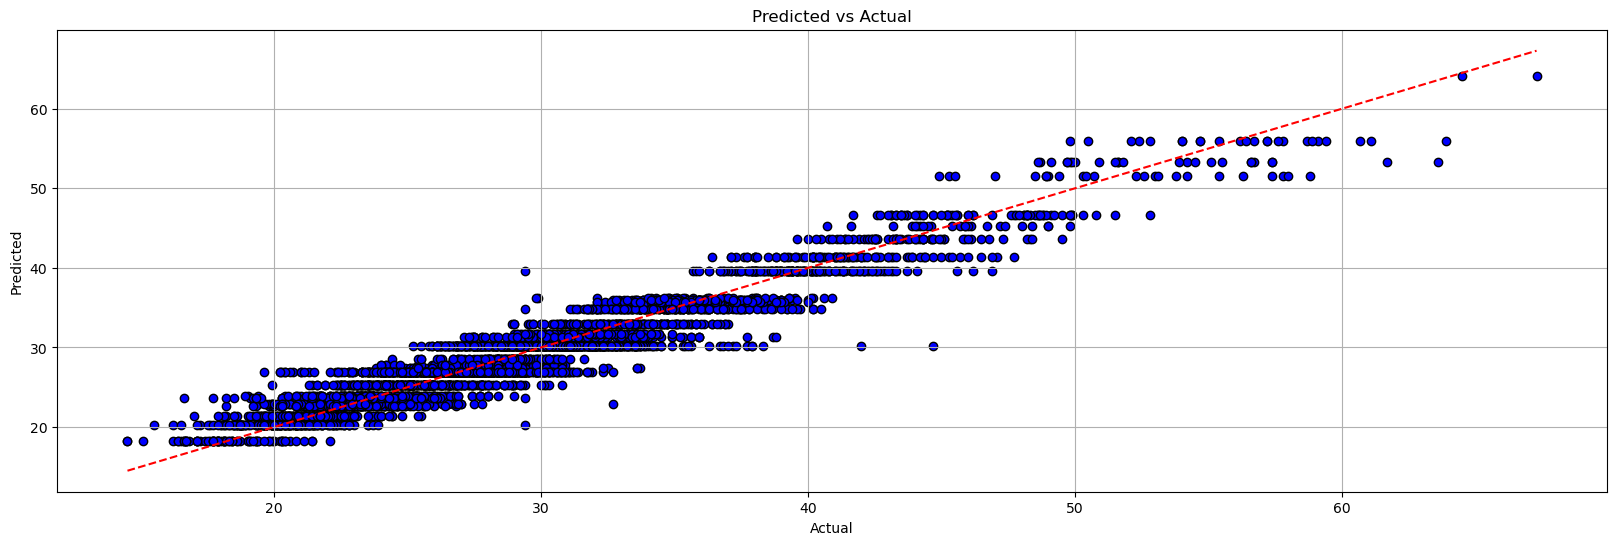

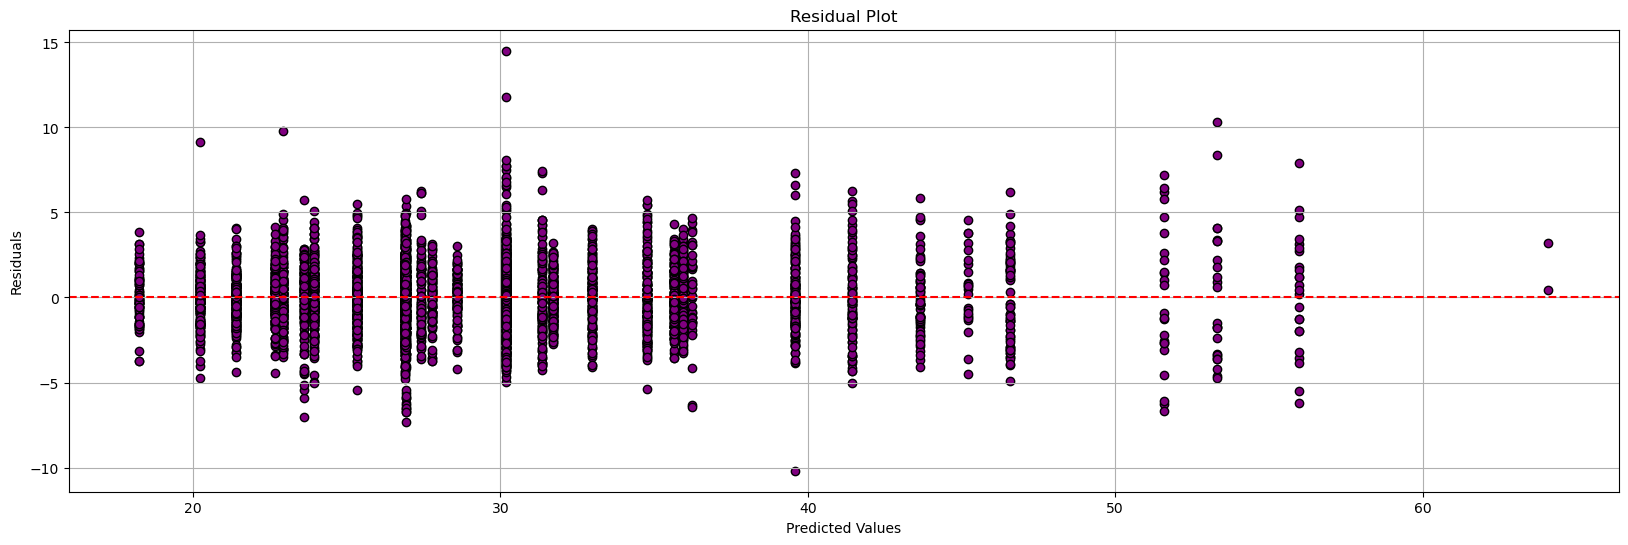

In [7]:
## Regression Tree :
tree_model(X,y)

# Random Forest Regression

## Model Overview

Random Forest Regression is an **ensemble learning method** that builds multiple decision trees and averages their predictions to improve accuracy and reduce overfitting. Each tree is trained on a random subset of the data and a random subset of features, introducing **diversity** into the model.

The final prediction is obtained by taking the **average of predictions** from all trees.

## Motivation for Using Random Forest

* Reduces **overfitting** common in individual decision trees
* Automatically handles **nonlinearity and feature interactions**
* Less sensitive to noise due to **bagging (bootstrap aggregation)**
* Provides built-in feature importance estimates

## Model Implementation

A Random Forest Regressor was trained on the dataset with tuned hyperparameters:

* Number of trees (`n_estimators`)
* Maximum depth of trees (`max_depth`)
* Number of features per split (`max_features`)
* Minimum samples per split/leaf

Each tree contributes independently to the final prediction, and randomization ensures better generalization.

## Prediction and Evaluation

Model performance was evaluated on the training and test sets using:

* **Mean Squared Error (MSE)**
* **R-squared (R²)**

Due to its ensemble nature, Random Forest is expected to outperform a single decision tree, especially on unseen data.

## Visualization

* **Actual vs. Predicted Plot**: To inspect model accuracy

## Insights

* Random Forest provides **stable, accurate predictions** by reducing variance
* Outperforms linear and single-tree models in terms of generalization
* Interpretation is harder due to the model's complexity, but **feature importance** helps understand major contributors

Next, we move to **XGBoost Regression**, a boosting-based ensemble technique that often achieves even higher accuracy by sequentially improving weak learners.


NaN in x: 0
NaN in y: 0

=== Random Forest Results ===
Trees: 100, Features: 27
Train MSE: 1.5152, Test MSE: 1.7960
Train R²: 0.9698, Test R²: 0.9627
Adjusted R²: 0.9696


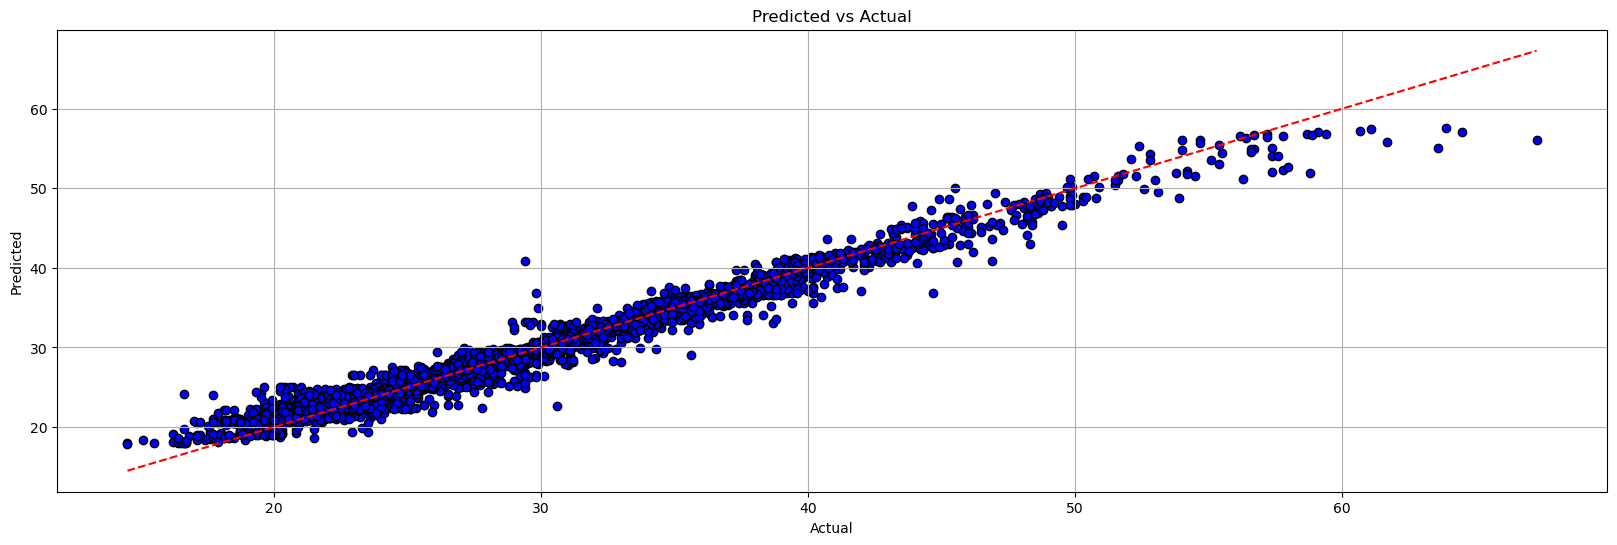

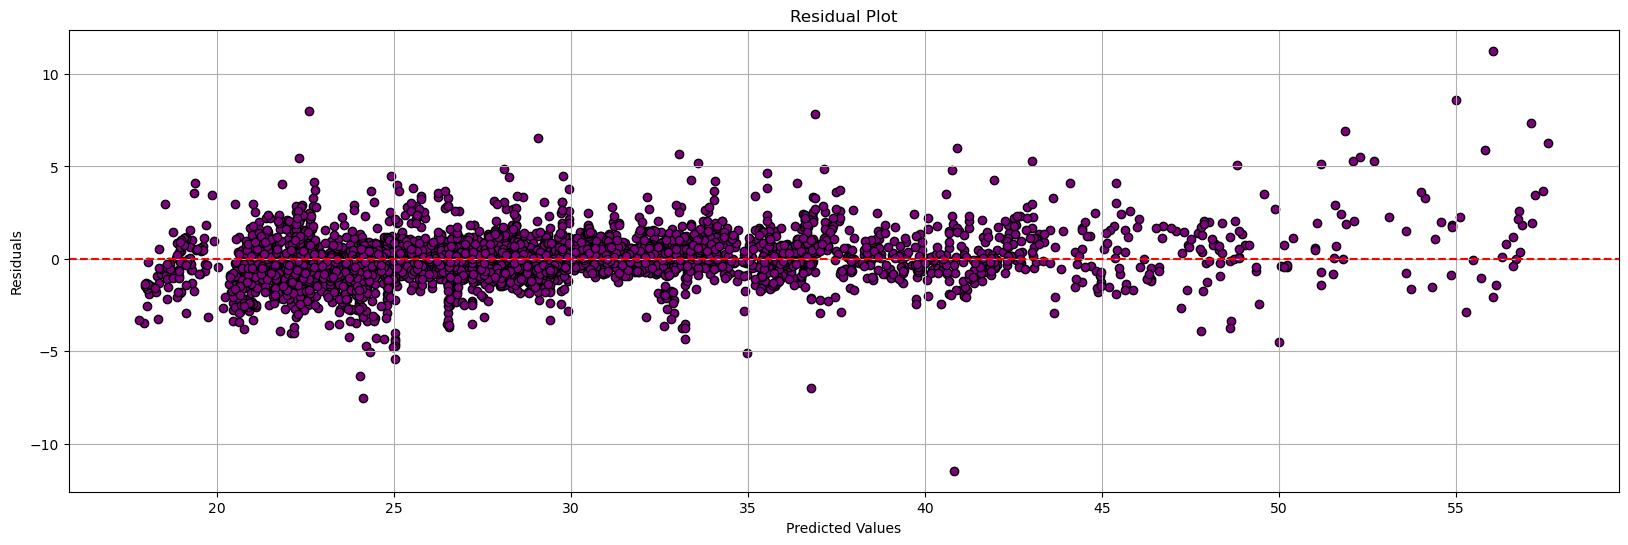

{'model': 'random_forest',
 'train_mse': 1.5152283959656918,
 'test_mse': 1.7959927431877514,
 'train_r2': 0.9697582529665844,
 'test_r2': 0.9626585221439791,
 'adj_r2': 0.9695791899907286}

In [8]:
y_r = data[ 'BMXBMI']
x_r = data[selected_features]


# If NaN exist, clean again (example):
x_r = x_r.fillna(x_r.mean())
y_r = y_r.fillna(y_r.mean())




random_forest(x_r, y_r, 100)



##  **XGBoost Regression**

**XGBoost (Extreme Gradient Boosting)** is an advanced ensemble learning method based on **gradient boosting trees**. It builds multiple decision trees sequentially, where each new tree corrects the errors made by previous ones. XGBoost is highly optimized, scalable, and often delivers state-of-the-art performance on structured/tabular data.

In this project, XGBoost was applied to predict **Body Mass Index (BMI)** using the features from the NHANES dataset.

###  Model Highlights:

* Captures complex **non-linear relationships** and **feature interactions**.
* Regularized to reduce **overfitting**.
* Highly efficient and can handle large datasets.

###  Performance Summary:

* **Train R²**: 0.9866
* **Test R²**: 0.9827
* **Train MSE**: 0.6721
* **Test MSE**: 0.8343
* **Adjusted Train R²**: 0.9865
* **Adjusted Test R²**: 0.9822

These results indicate that XGBoost achieved **high accuracy and generalization** ability, outperforming most other models in both training and testing phases. It proved to be one of the best performing models for BMI prediction in this study.




In [9]:
result = xgboost_regressor(X_train, y_train, X_test,y_test, n_estimators = 500, learning_rate= 0.01 , max_depth = 3)


Final Train MSE: 0.6721
Final Test MSE:  0.8343
Final Train R²:  0.9866
Final Test R²:   0.9827
Train Adj R²:    0.9865
Test Adj R²:     0.9822




##  Model Comparison using Multiple Regressors

In this section, a variety of **regression models** were applied on the NHANES dataset using the selected features. The objective was to compare their performance in predicting **Body Mass Index (BMI)**, the target variable.
 Models Used

* **Ordinary Least Squares (OLS)**: Basic linear regression model assuming a linear relationship between predictors and target.
* **Ridge Regression**: Linear model with L2 regularization to prevent overfitting.
* **Lasso Regression**: Linear model with L1 regularization, also useful for feature selection.
* **Decision Tree Regressor**: A tree-based model that recursively splits the data to reduce variance.
* **Random Forest Regressor**: An ensemble of decision trees that improves performance by averaging multiple predictions.
* **XGBoost Regressor**: An optimized gradient boosting technique designed for efficiency and high predictive power.
* **Bayesian Ridge Regression**: A probabilistic linear model that incorporates uncertainty in model coefficients.

Each model was trained on the **training split** of the dataset and evaluated using **R² Score** (coefficient of determination) and **Mean Squared Error (MSE)** on the test set.

###  Evaluation Metrics

* **R² Score**: Measures how well the variance in the target variable is explained by the features. Closer to 1 is better.
* **MSE (Mean Squared Error)**: Measures average squared difference between predicted and actual values. Lower is better.

###  Workflow Summary

* Initialized all models in a dictionary.
* Trained each model using `fit()` on training data.
* Predicted on the test set.
* Collected R² and MSE values for each model.
* Printed results for easy comparison.
* **Bayesian Ridge Regression** was evaluated separately due to its different API structure.



In [10]:

# import sys
# !{sys.executable} -m pip install xgboost
from xgboost import XGBRegressor



models = {
    'OLS': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.01),
    'Decision Tree': DecisionTreeRegressor(max_depth=5, random_state=42),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, max_depth=5, learning_rate=0.1, random_state=42, n_jobs=-1)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    results[name] = {'R2': r2, 'MSE': mse}
    print(f"{name} => R2: {r2:.4f}, MSE: {mse:.4f}")

model = BayesianRidge()
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test  = model.predict(X_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test  = r2_score(y_test, y_pred_test)

mse_train = mean_squared_error(y_train, y_pred_train)
mse_test  = mean_squared_error(y_test, y_pred_test)

print("Bayesian Inbuilt (no interaction)")
print(f"Train R²: {r2_train:.4f}, Test R²: {r2_test:.4f}")
print(f"Train MSE: {mse_train:.4f}, Test MSE: {mse_test:.4f}")

# Custom Bayesian model (optional)
# sigma2 = 0.01
# tau2 = 1
# y_pred_bayes = bayesian_predict(X_train, y_train, X_test, sigma2, tau2)
# r2_bayes = r2_score(y_test, y_pred_bayes)
# mse_bayes = mean_squared_error(y_test, y_pred_bayes)
# results['Bayesian Linear'] = {'R2': r2_bayes, 'MSE': mse_bayes}
# print(f"Bayesian Linear => R2: {r2_bayes:.4f}, MSE: {mse_bayes:.4f}")


OLS => R2: 0.9854, MSE: 0.7029
Ridge => R2: 0.9854, MSE: 0.7029
Lasso => R2: 0.9854, MSE: 0.7007
Decision Tree => R2: 0.9068, MSE: 4.4838
Random Forest => R2: 0.9447, MSE: 2.6594
XGBoost => R2: 0.9943, MSE: 0.2764
Bayesian Inbuilt (no interaction)
Train R²: 0.9849, Test R²: 0.9854
Train MSE: 0.7575, Test MSE: 0.7024


## **Adding Interaction Terms**

To improve the predictive performance of our linear models, we engineered a new set of features using **interaction terms**. These capture **non-linear relationships** between body measurements and health indicators which may influence BMI jointly, rather than independently.

> Note: Interaction terms are **only used with linear models** (Linear, Ridge, Lasso, Bayesian)  
> They are **not needed for tree-based models** (Decision Tree, Random Forest, XGBoost) since those capture interactions inherently.




 Skewness & Kurtosis of features:
BMXWAIST             | Skew: 0.61 | Kurtosis: 0.69


C:\Users\user\AppData\Local\Temp\ipykernel_4016\2473670438.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw['BMXWT*BMXWAIST'] = data['BMXWT']*data['BMXWAIST']
C:\Users\user\AppData\Local\Temp\ipykernel_4016\2473670438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_raw['BMXWT*BMXARMC'] = data['BMXWT']*data['BMXARMC']
C:\Users\user\AppData\Local\Temp\ipykernel_4016\2473670438.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_in

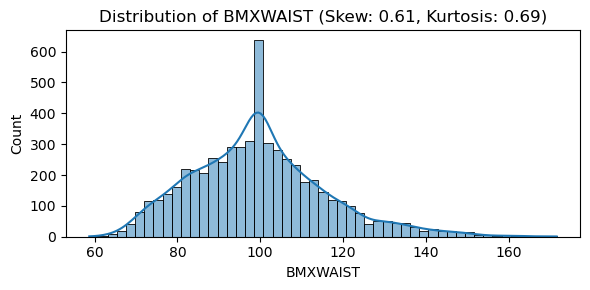

BMXARMC              | Skew: 0.53 | Kurtosis: 0.64


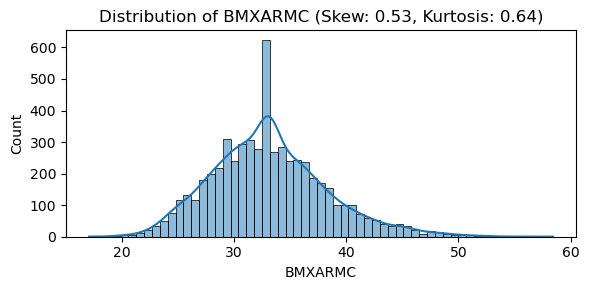

BMXARML              | Skew: 0.07 | Kurtosis: -0.09


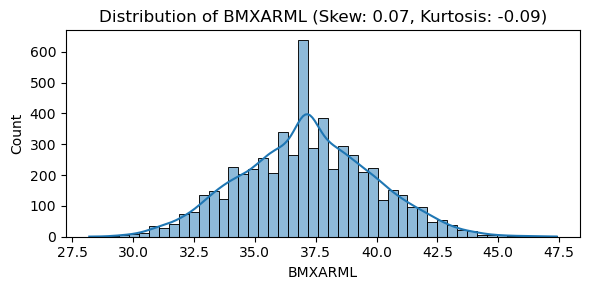

BMXWT                | Skew: 1.02 | Kurtosis: 1.67


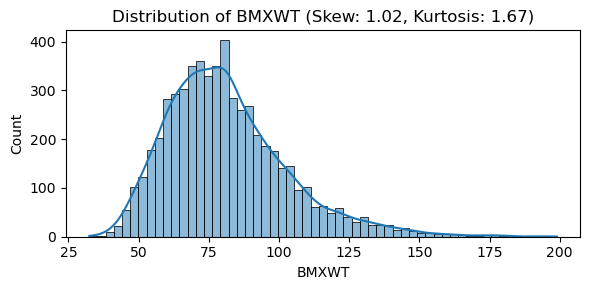

BMXWT*BMXWAIST       | Skew: 1.54 | Kurtosis: 3.70


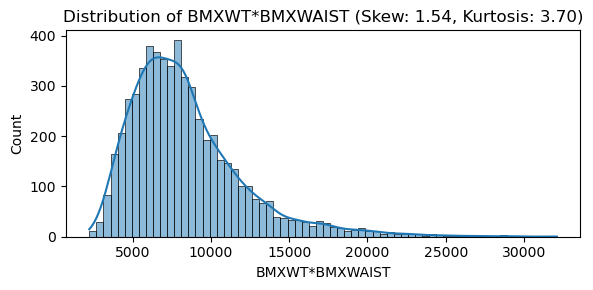

BMXWT*BMXARMC        | Skew: 1.42 | Kurtosis: 2.99


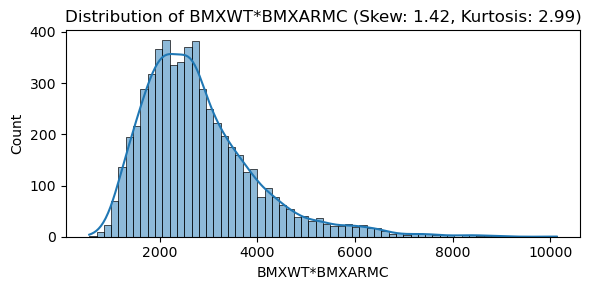

BMXWT*BMXARML        | Skew: 1.02 | Kurtosis: 1.54


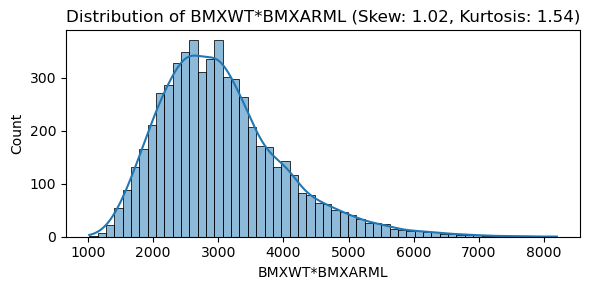

BMXWT*BMXHT          | Skew: 1.02 | Kurtosis: 1.66


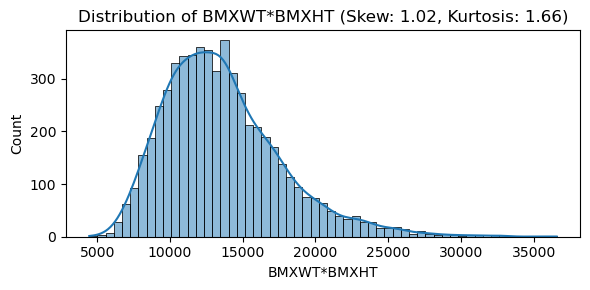

BMXARML*BMXHT        | Skew: 0.23 | Kurtosis: -0.21


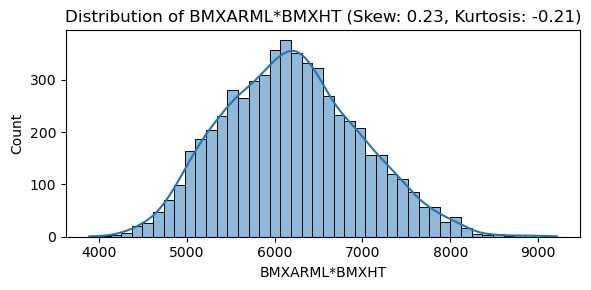

BMXHIT*BMXLEG        | Skew: 0.21 | Kurtosis: -0.15


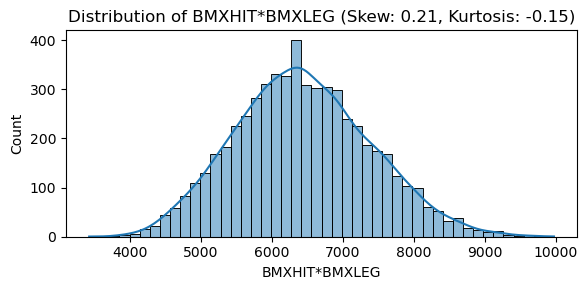

BMXARML*BMXLEG       | Skew: 0.25 | Kurtosis: -0.06


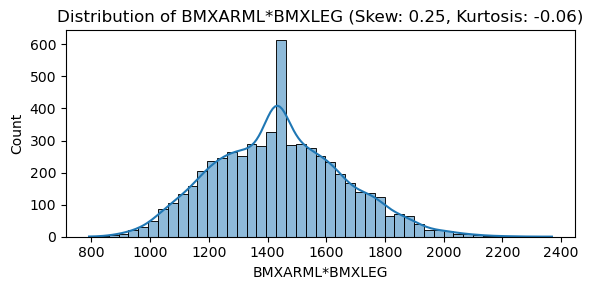

BMXARMC*BMXWAIST     | Skew: 1.06 | Kurtosis: 1.79


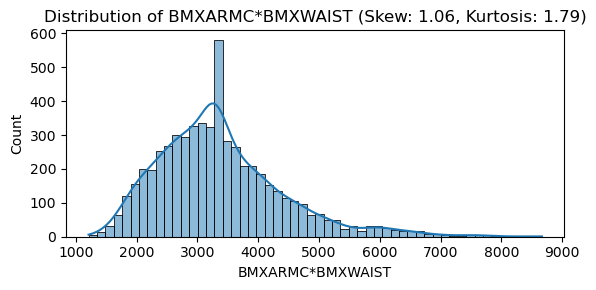

BPXSY2*BPXSY1        | Skew: 1.71 | Kurtosis: 5.40


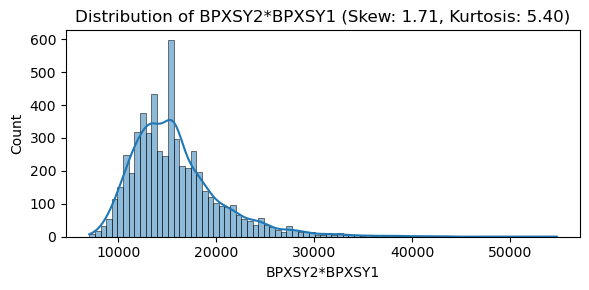

BPXDI2*BPXDI1        | Skew: 0.57 | Kurtosis: 1.78


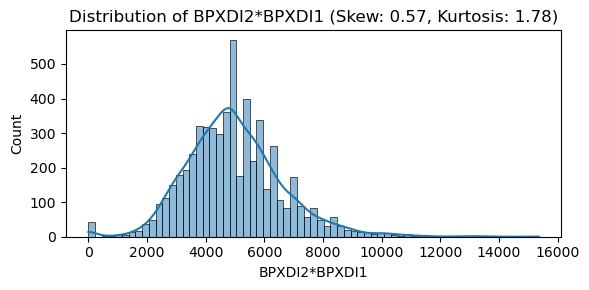

DMDEDUC2*INDFMPIR    | Skew: 0.85 | Kurtosis: -0.40


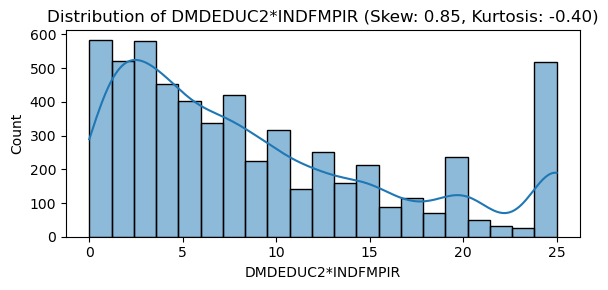

WTINT2YR*INDFMPIR    | Skew: 2.52 | Kurtosis: 6.23


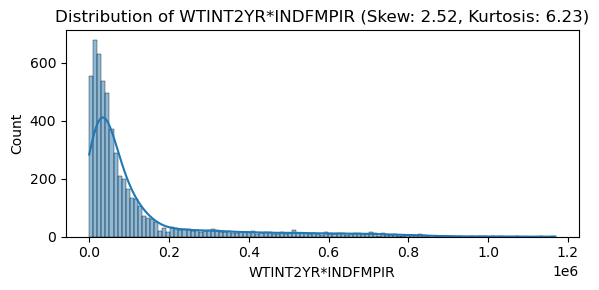

RIDAGEYR*BPXSY2      | Skew: 0.51 | Kurtosis: -0.42


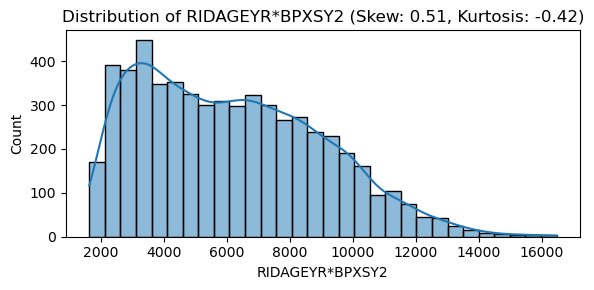

RIDAGEYR*BPXSY1      | Skew: 0.52 | Kurtosis: -0.42


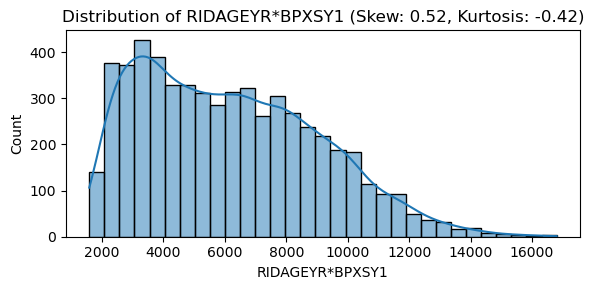


 Relationship with Target (charges):


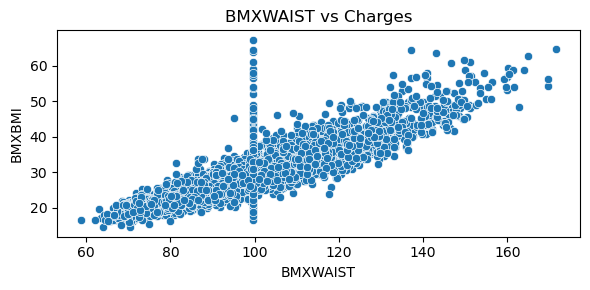

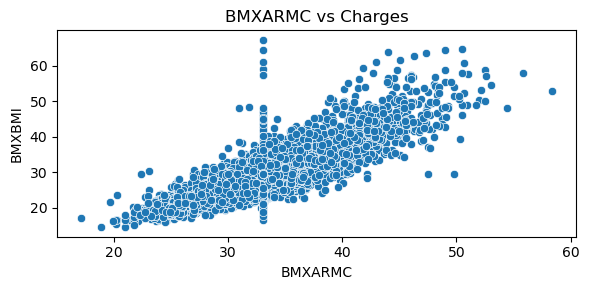

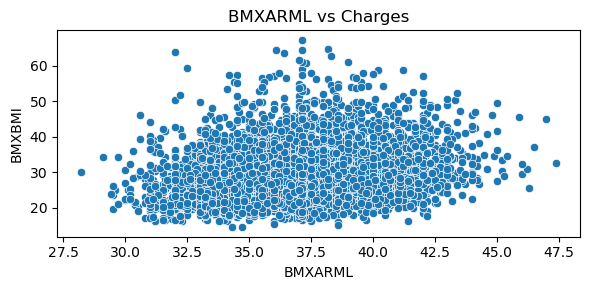

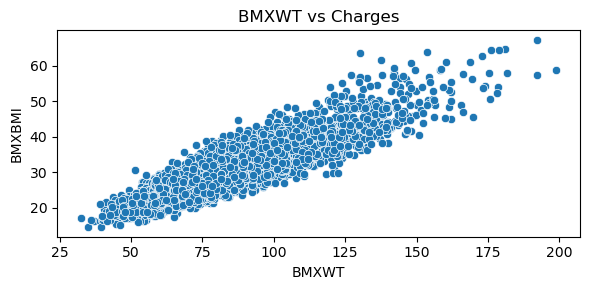

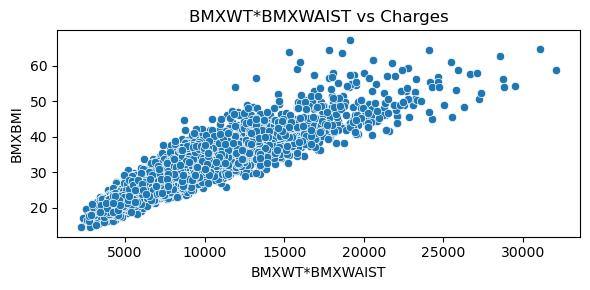

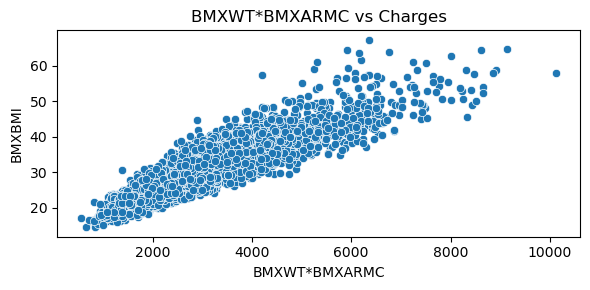

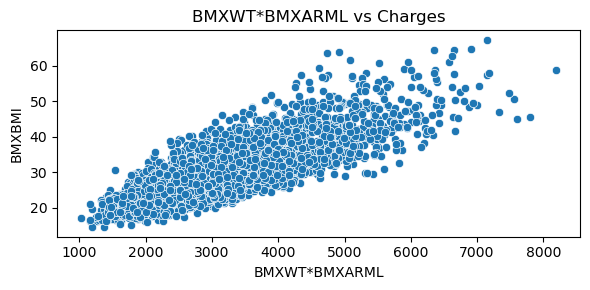

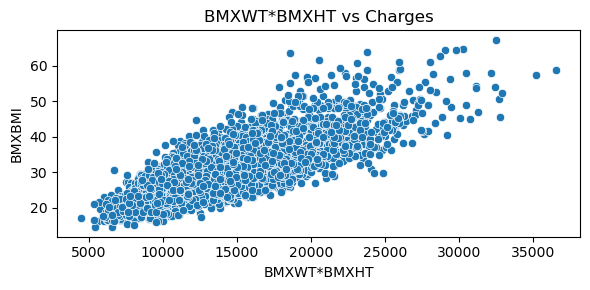

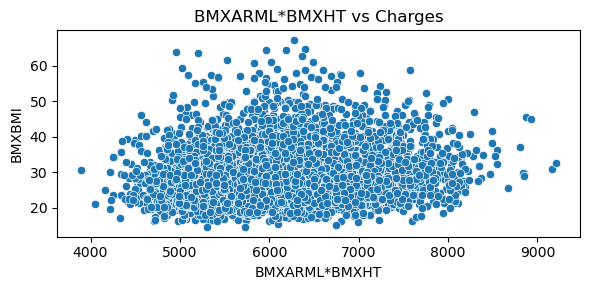

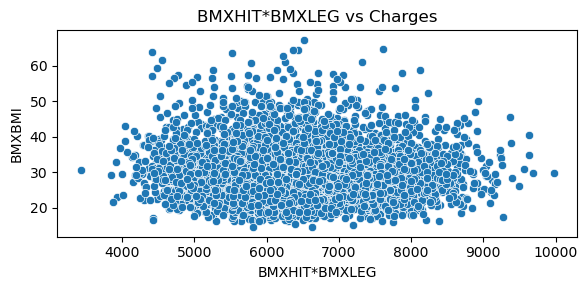

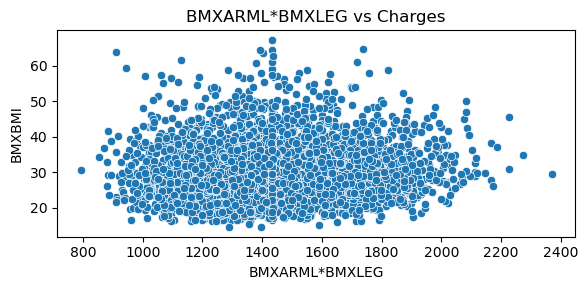

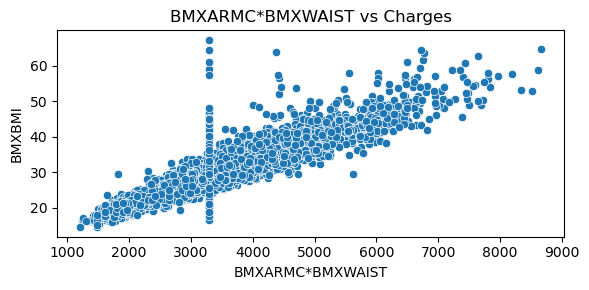

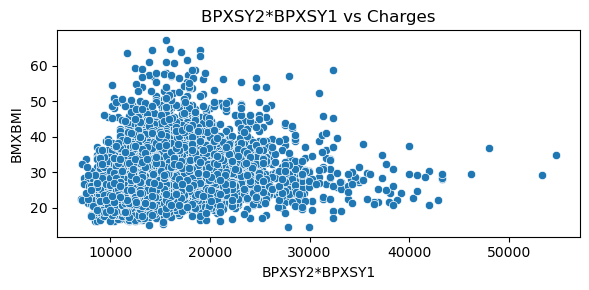

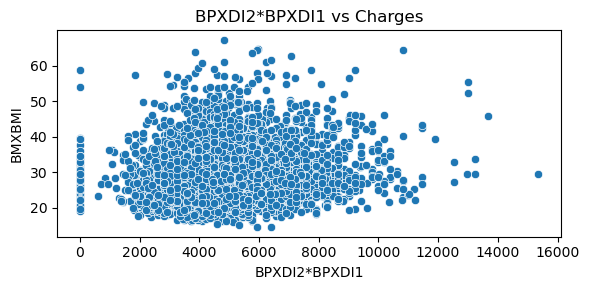

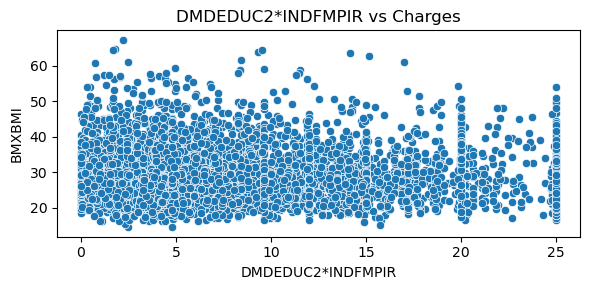

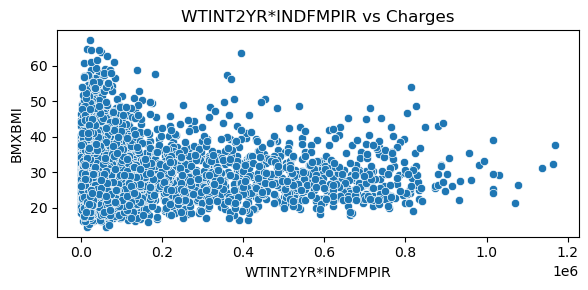

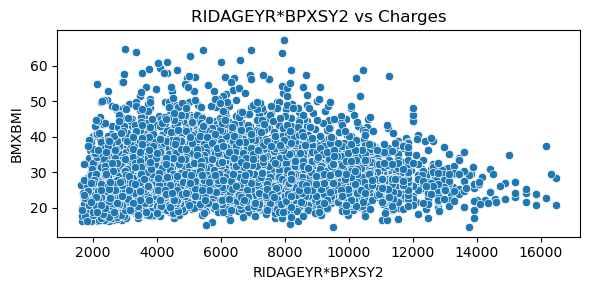

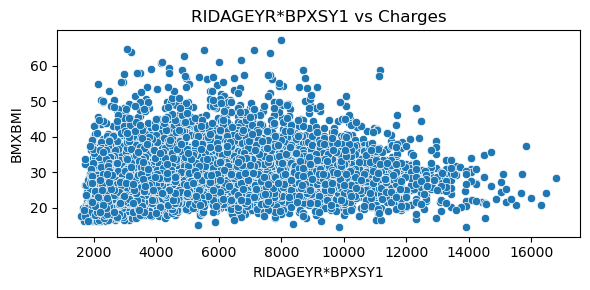

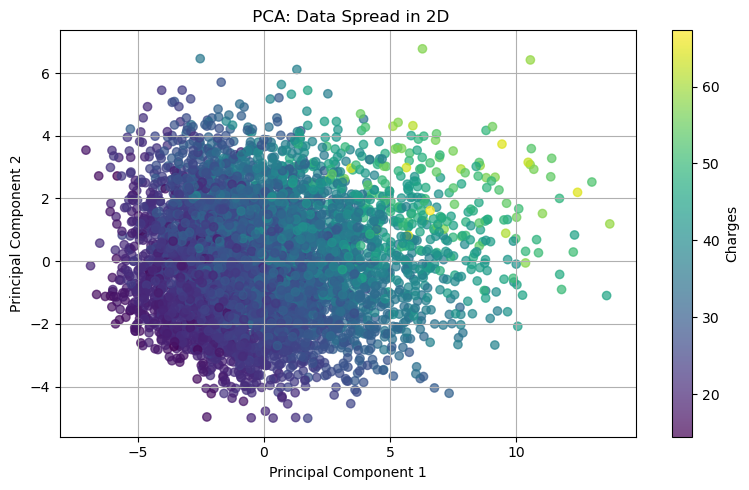

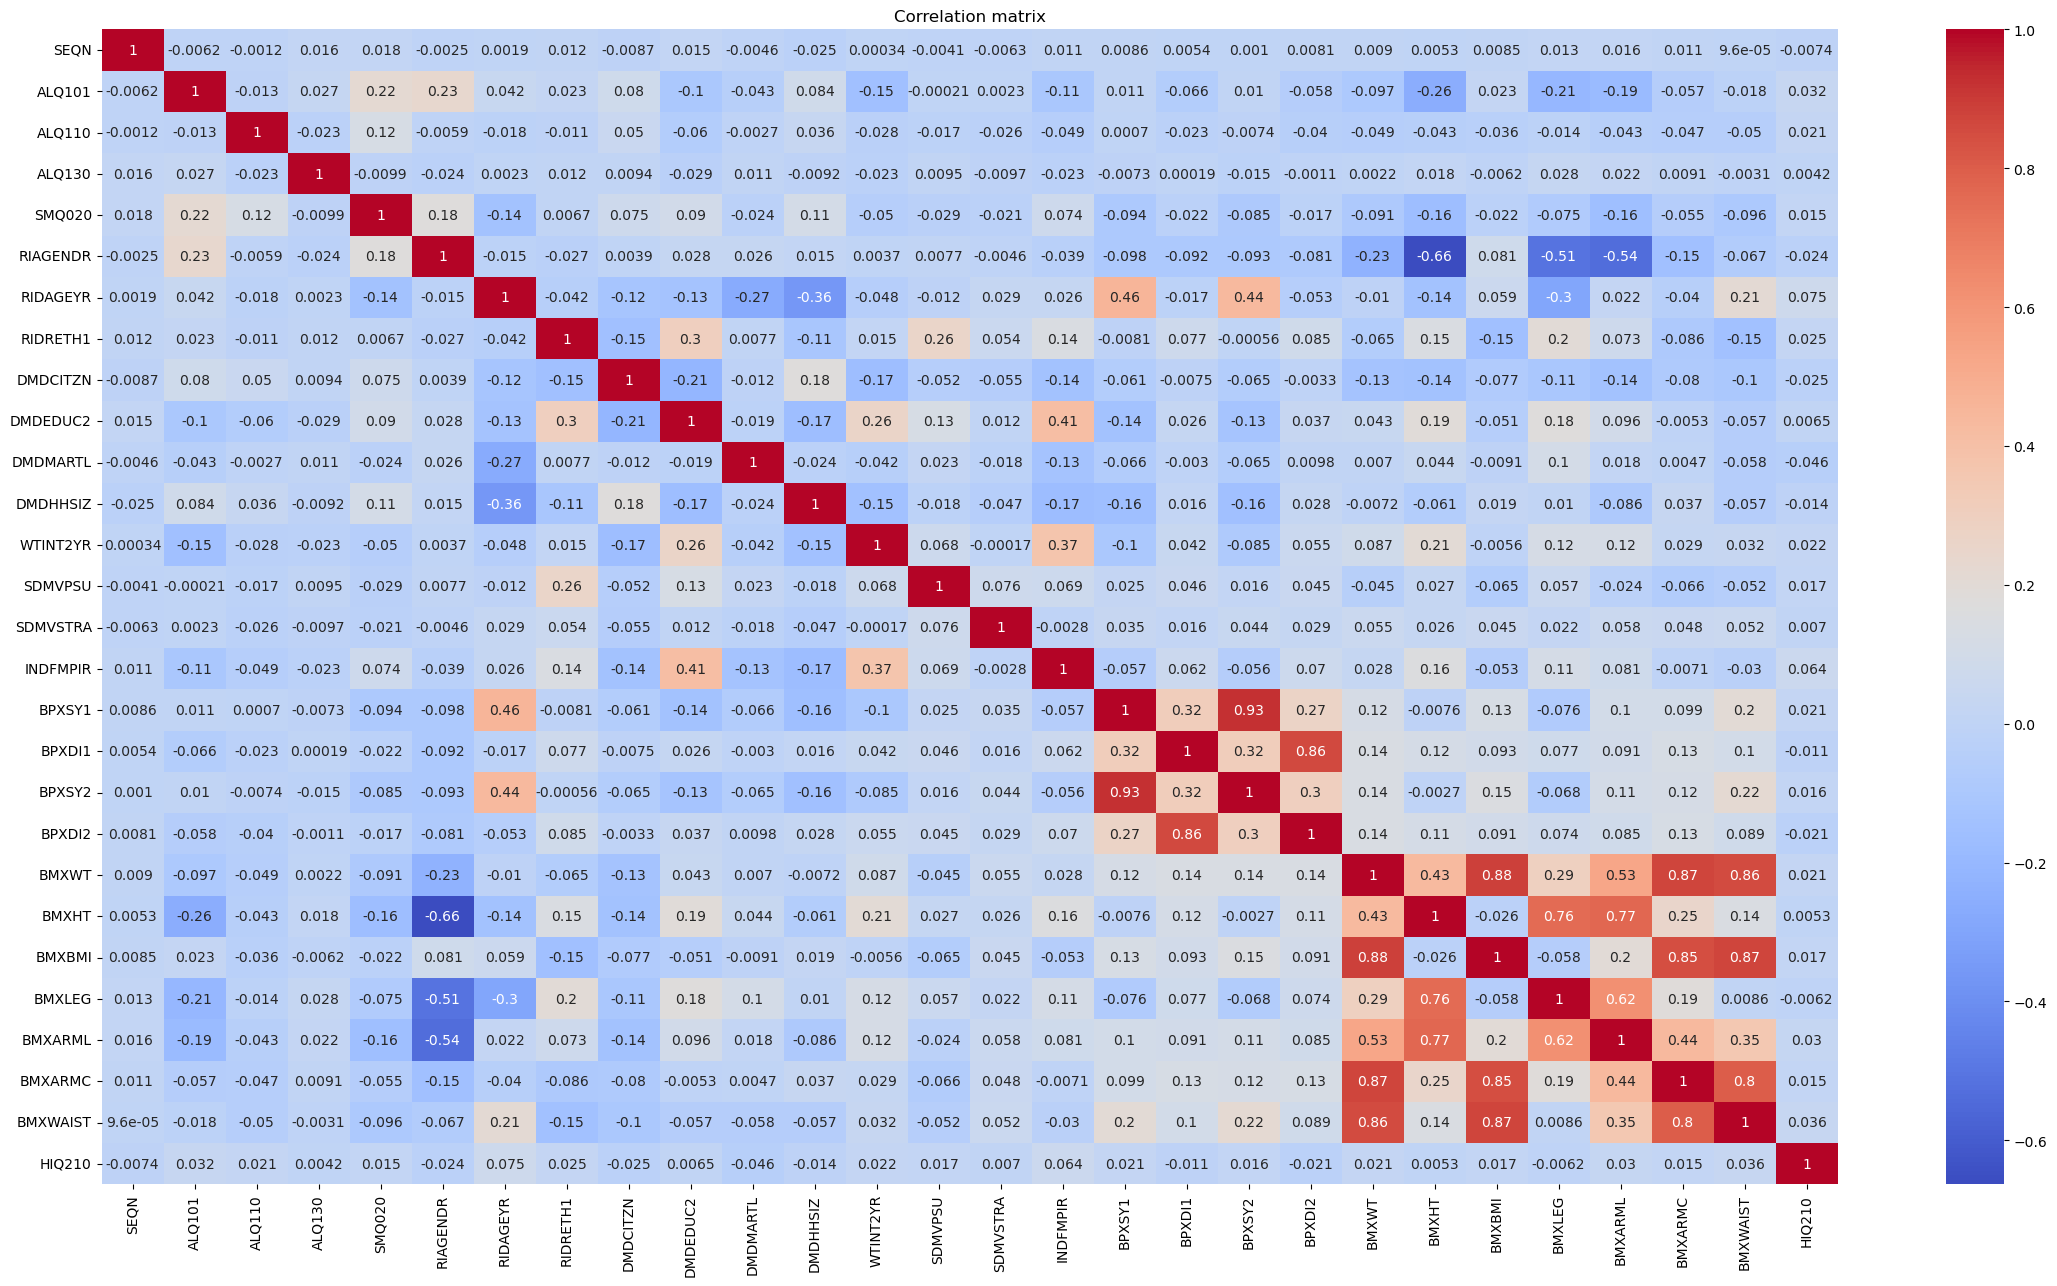

In [11]:

X_raw = data[['BMXWAIST', 'BMXARMC', 'BMXARML', 'BMXWT']]
X_raw['BMXWT*BMXWAIST'] = data['BMXWT']*data['BMXWAIST']
X_raw['BMXWT*BMXARMC'] = data['BMXWT']*data['BMXARMC']
X_raw['BMXWT*BMXARML'] = data['BMXWT']*data['BMXARML']
X_raw['BMXWT*BMXHT'] = data['BMXWT']*data['BMXHT']
X_raw['BMXARML*BMXHT'] = data['BMXARML']*data['BMXHT']
X_raw['BMXHIT*BMXLEG'] = data['BMXLEG']*data['BMXHT']
X_raw['BMXARML*BMXLEG'] = data['BMXLEG']*data['BMXARML']
X_raw['BMXARMC*BMXWAIST'] = data['BMXWAIST']*data['BMXARMC']

X_raw['BPXSY2*BPXSY1'] = data['BPXSY1']*data['BPXSY2']
X_raw['BPXDI2*BPXDI1'] = data['BPXDI1']*data['BPXDI2']
X_raw['DMDEDUC2*INDFMPIR'] = data['DMDEDUC2']*data['INDFMPIR']
X_raw['WTINT2YR*INDFMPIR'] = data['WTINT2YR']*data['INDFMPIR']
X_raw['RIDAGEYR*BPXSY2'] = data['RIDAGEYR']*data['BPXSY2']
X_raw['RIDAGEYR*BPXSY1'] = data['RIDAGEYR']*data['BPXSY1']
# X_raw['RIAGENDR*BMXLEG'] = data['RIAGENDR']*data['BMXLEG']
# X_raw['RIAGENDR*BMXARMC'] = data['RIAGENDR']*data['BMXARML']
# X_raw['RIAGENDR*BMXHT'] = data['RIAGENDR']*data['BMXHT']



# Step 4: Target
y = data[ 'BMXBMI']

# relational plot between features and target variables
data_plot(data, X_raw, y)

X= X_raw.values
y = data[ 'BMXBMI'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Multiple Linear Regression with Interaction Terms

To improve the predictive performance of our baseline linear model, we applied **Multiple Linear Regression** on a set of features that included both original selected variables and engineered **pairwise interaction terms**. These interaction terms allowed the model to capture non-additive effects between body measurements and health indicators that influence BMI jointly.

By incorporating these interactions, the linear regression model was able to model more complex relationships while still maintaining interpretability. The performance of this model served as a reference point for evaluating the impact of regularization (Ridge, Lasso) and non-linear models (Random Forest, XGBoost).



--- Train Evaluation ---


Residual Standard Error (RSE): 0.44951984095602177
R-squared: 0.995983717477109
Correlation between actual and predicted: 0.9979898383636524
R-squared vs. Correlation squared: 0.995983717477109 vs 0.995983717477109
H1: F-statistic = 62947.23180254794 → likely significant.

--- Test Evaluation ---
Residual Standard Error (RSE): 0.4017192457811695
R-squared: 0.9967002739646847
Correlation between actual and predicted: 0.9983495329426778
R-squared vs. Correlation squared: 0.9967002739646847 vs 0.9967017899268629


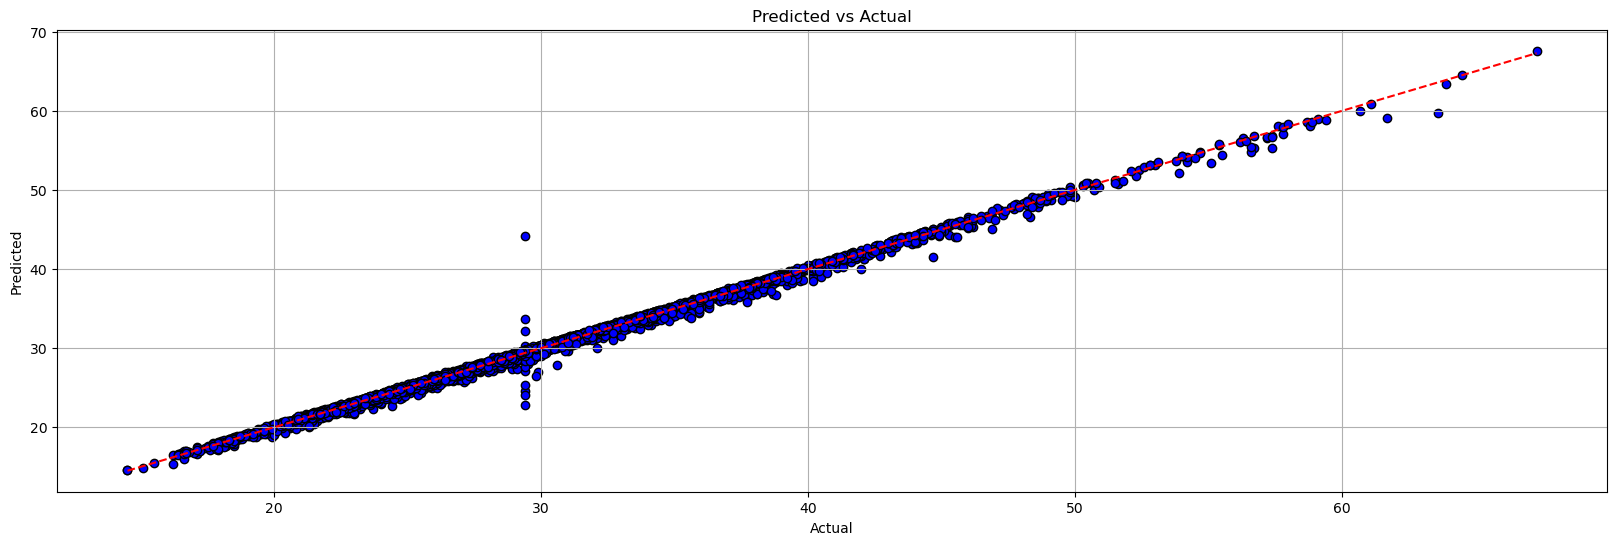

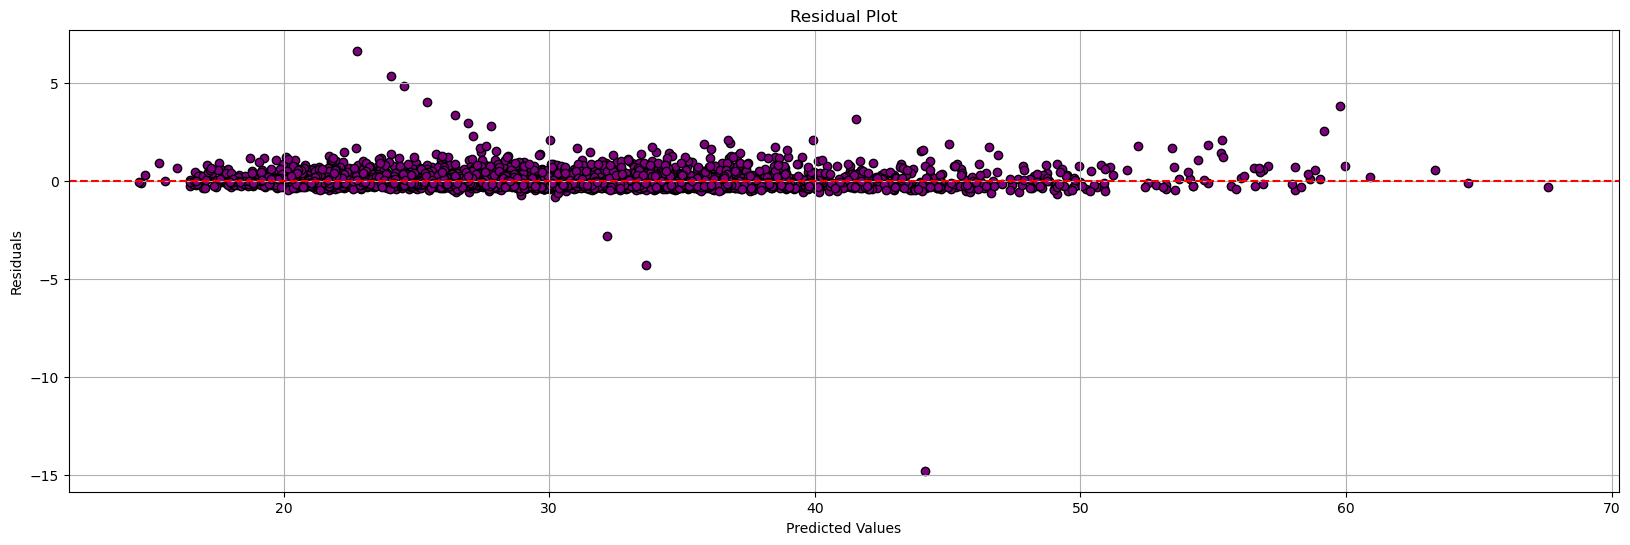

In [12]:
train_result = run_multiple_linear_regression(X_train, y_train,X_test, y_test, feature_names=selected_features)


## Bayesian Linear Regression with Interaction Terms

Bayesian Linear Regression was applied to the interaction-enhanced feature set to incorporate uncertainty into the model's predictions. Unlike standard linear regression, the Bayesian approach provides a full posterior distribution over model coefficients, offering not only point estimates but also credible intervals for each prediction.

The inclusion of **interaction terms** in this model allows it to capture more nuanced relationships among body measurements and health indicators influencing BMI. This is especially valuable in a Bayesian context, where uncertainty around these joint effects can be explicitly quantified. The model’s probabilistic nature makes it well-suited for inference and decision-making under uncertainty.



--- Training Results (Bayesian Linear Regression) ---
Train MSE: 0.2185
Train R² : 0.9956


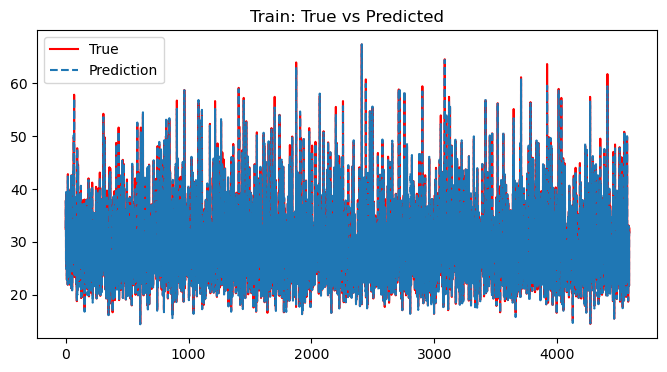


--- Testing Results (Bayesian Linear Regression) ---
Test MSE : 0.1925
Test R²  : 0.9960


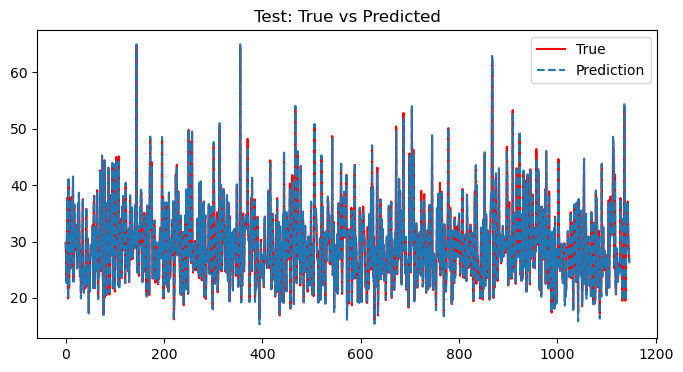

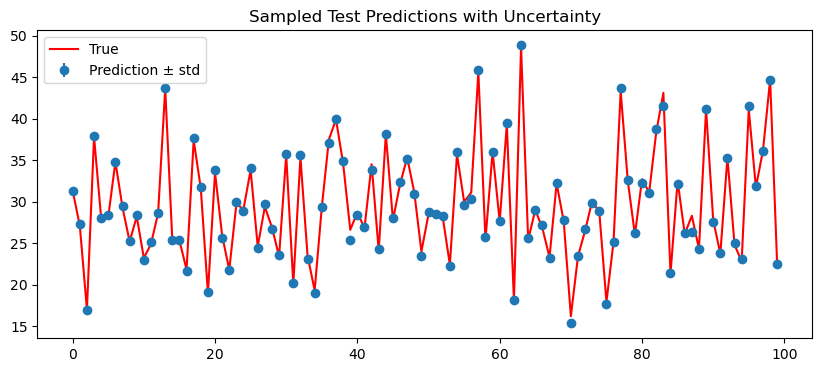

In [13]:
# 1. Train model
mu_post, Sigma_post = train_bayesian_linear_regression(X_train, y_train)
# 2. Evaluate on test data
test_bayesian_linear_regression(X_test, y_test, mu_post, Sigma_post)


##  Ridge Regression with Interaction Terms

Ridge Regression was applied to the feature set with interaction terms to address potential multicollinearity and overfitting introduced by the expanded feature space. By adding an L2 penalty to the loss function, Ridge shrinks the coefficients of less informative features, improving generalization.

The interaction terms allow the model to capture complex dependencies between variables like weight, waist circumference, blood pressure, and socioeconomic indicators — while Ridge regularization ensures the model remains stable and robust.



The best lambda is : 1000.0000
Final training MSE is : 2.8332

Train R^2 : 0.9435
Train MSE : 2.8332
Adjusted R^2 is : 0.9432
AIC is : 4813.9532
BIC is : 4929.7148
 Test R2: 0.9494
 Test MSE: 2.4360


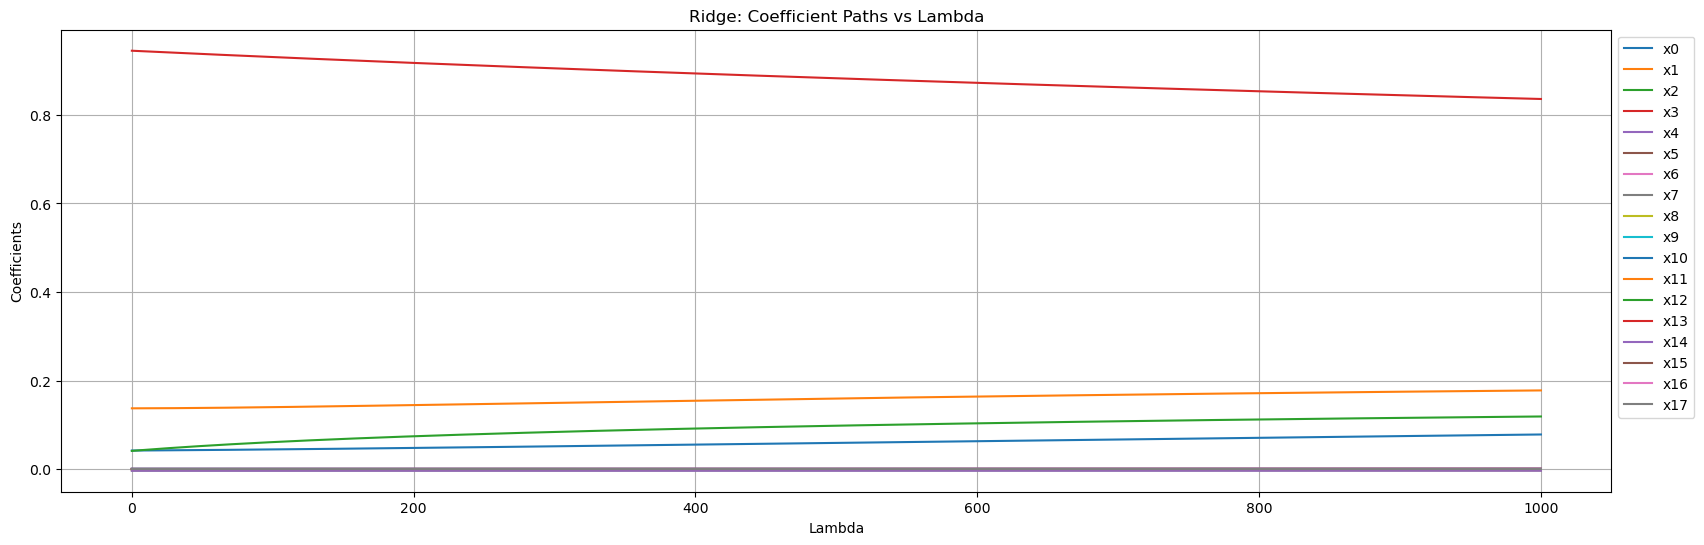

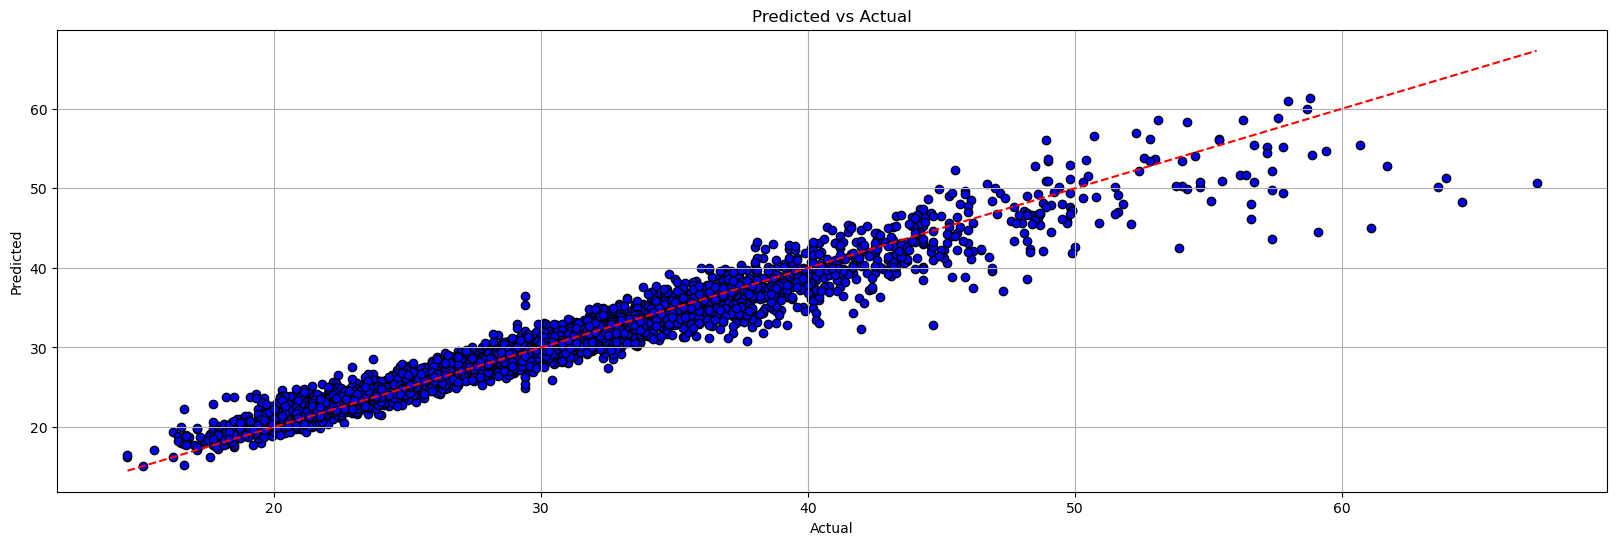

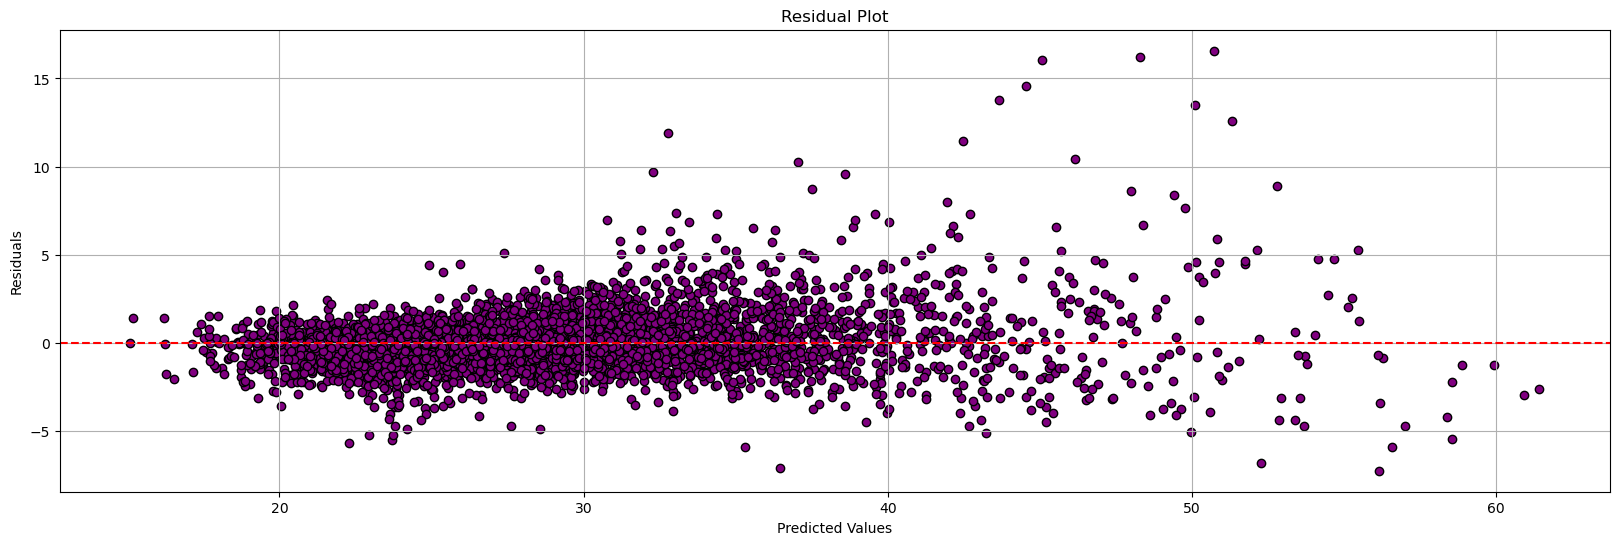

array([ 2.29121598e+01,  4.33886545e-02,  1.68547136e-01, -8.94178864e-02,
        6.96605506e-02,  2.68675020e-04,  9.07795231e-04,  1.07727676e-03,
        1.71986053e-04, -1.64195079e-03, -1.02937706e-03, -8.42238210e-04,
        6.50334252e-04,  9.20574155e-06, -3.55127580e-05, -1.13857513e-02,
       -5.14819901e-07, -8.32817957e-06, -1.92939141e-05])

In [14]:
lembda=  np.logspace(-4,3, 9000) 
ridge_model(data ,X_train , y_train , X_test, y_test, lembda)

## Lasso Regression with Interaction Terms

Lasso Regression was trained on the interaction-augmented dataset to perform both **regularization and feature selection**. The L1 penalty in Lasso forces many coefficients to exactly zero, thereby eliminating less important interaction effects and retaining only the most predictive relationships.

This makes Lasso particularly useful in high-dimensional settings like ours, where adding interaction terms greatly increases the number of features. Lasso helps simplify the model while still capturing essential non-linear effects influencing BMI.


Best Lambda Value: 0.0101

Lasso Results:
Train RSS: 1455.04
Test RSS: 303.41
Estimated Variance σ²: 0.32
Mallow's Cp: 0.32
AIC: 0.32
BIC: 0.33
Train MSE: 0.32
Test MSE: 0.26
RMSE: 0.56
R² train: 0.9937
R² test: 0.9945
Adjusted R²: 0.9936


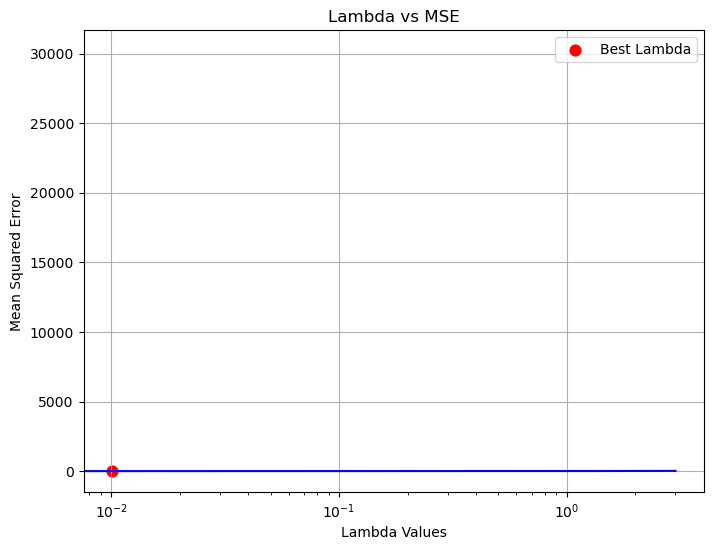

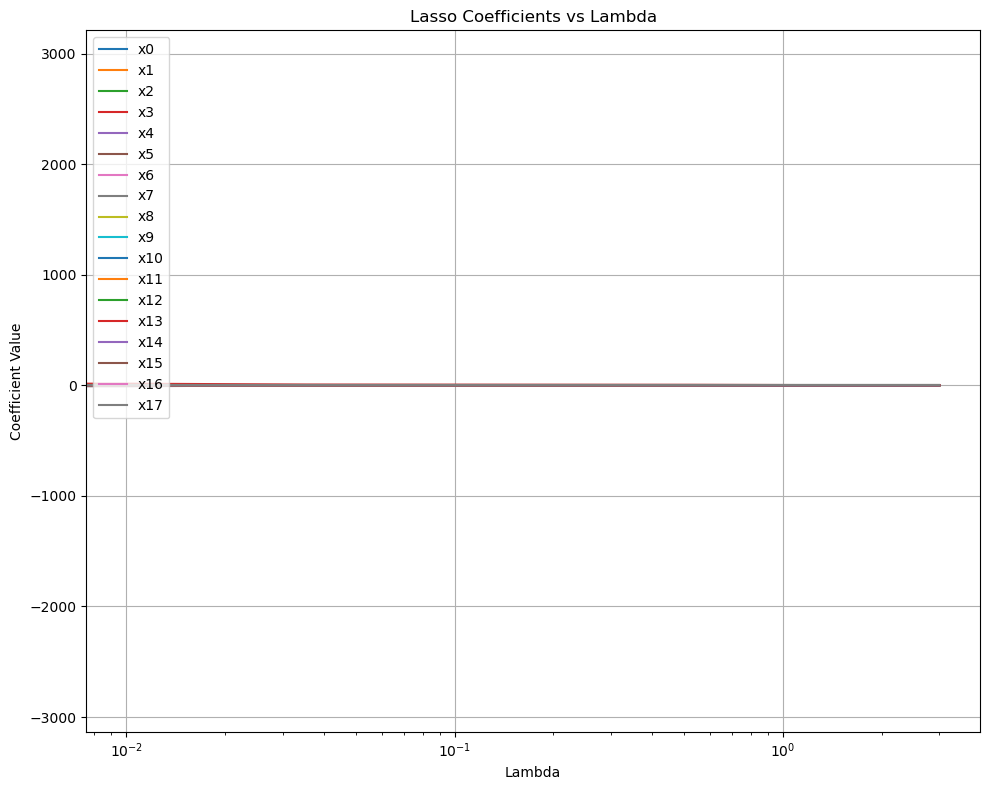

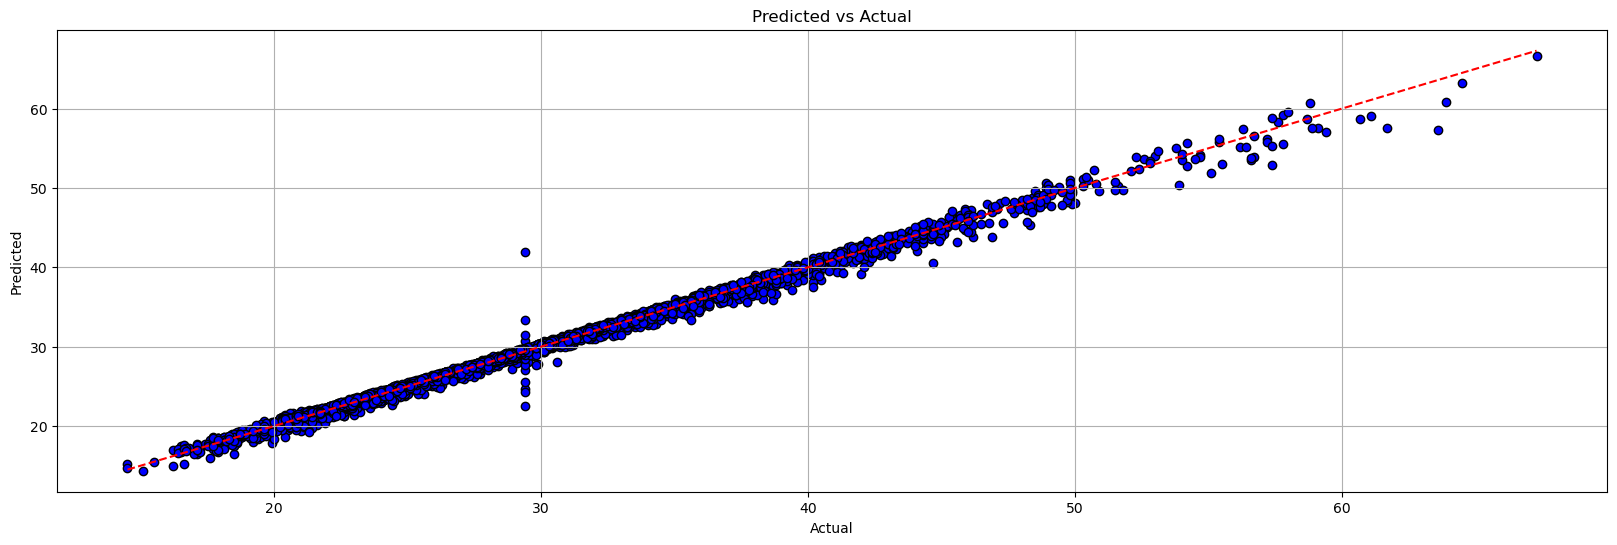

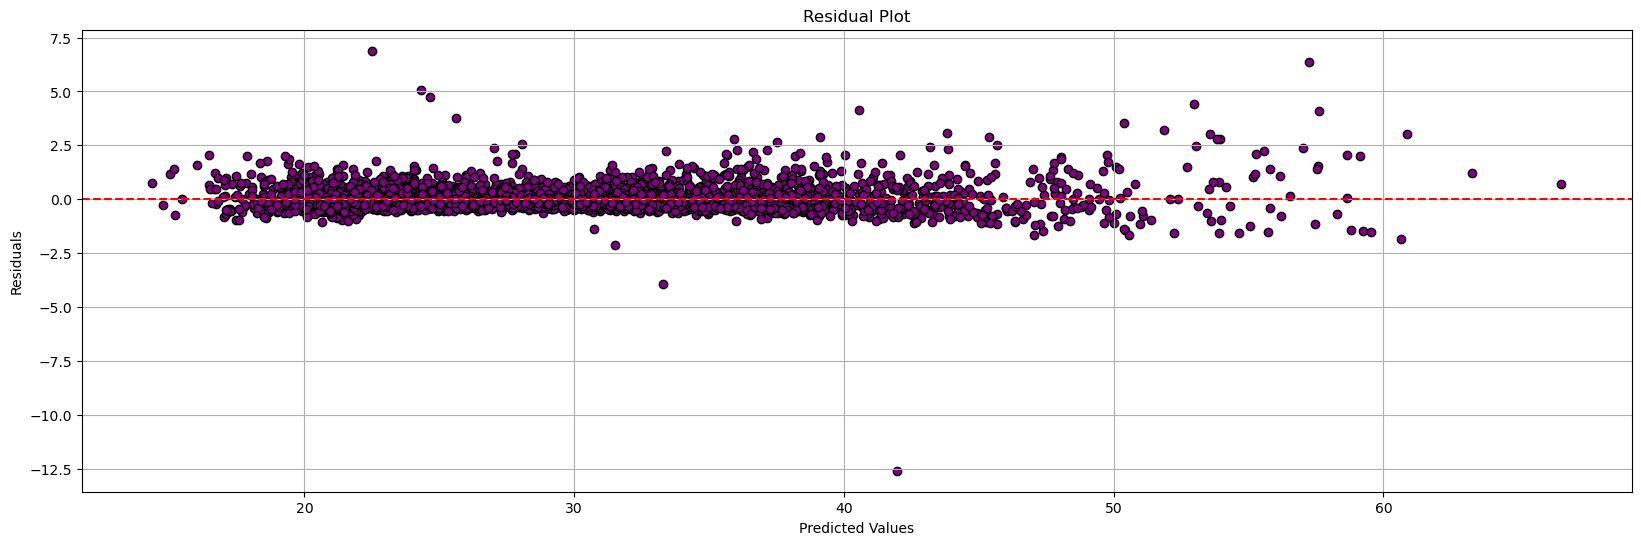

array([ 2.50299489e+00,  6.02820313e-03,  4.96388680e-02,  5.82204110e-01,
        6.93993422e-01,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.08943767e-03, -3.84926797e-03, -1.71007715e-04,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -8.53573249e-06, -3.07283987e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00])

In [15]:
lmda = np.linspace(-2,3,200)
lasso(X, y, lmda)

## Comparative Evaluation of All Models

To assess model performance comprehensively, we evaluated each regression model using:

1. **Full feature set** (original features only)
2. **Interaction-enhanced feature set** (engineered pairwise interactions)
3. **Inbuilt tree-based and probabilistic models** (which naturally learn interactions internally)

Tree-based models like Random Forest and XGBoost do not require manual interaction terms, as they inherently capture non-linear and feature interactions during training. Similarly, **Bayesian Linear Regression** was also evaluated without explicit interaction terms in an "inbuilt" mode, relying on its probabilistic nature to capture uncertainty and trends.

---

## Model Performance Comparison (R² Scores)

| Model                      | Train R² (Full) | Test R² (Full) | Train R² (Interaction) | Test R² (Interaction) | Test R² (Inbuilt) |
|----------------------------|-----------------|----------------|-------------------------|------------------------|--------------------|
| **Linear Regression (OLS)**     | 0.9849          | 0.9854         | 0.9960                  | 0.9967                 | 0.9854             |
| **Bayesian Linear Reg.**        | 0.9659          | 0.9644         | 0.9956                  | 0.9960                 | 0.9967             |
| **Ridge Regression**            | 0.9419          | 0.9515         | 0.9435                  | 0.9494                 | 0.9854             |
| **Lasso Regression**            | 0.9848          | 0.9855         | 0.9937                  | 0.9945                 | 0.9854             |
| **Regression Tree**             | 0.9206          | 0.9235         | 0.9206                  | 0.9235                 | 0.9068             |
| **Random Forest**               | 0.9698          | 0.9627         | 0.9698                  | 0.9627                 | 0.9447             |
| **XGBoost**                     | 0.9866          | 0.9827         | 0.9866                  | 0.9827                 | 0.9943             |


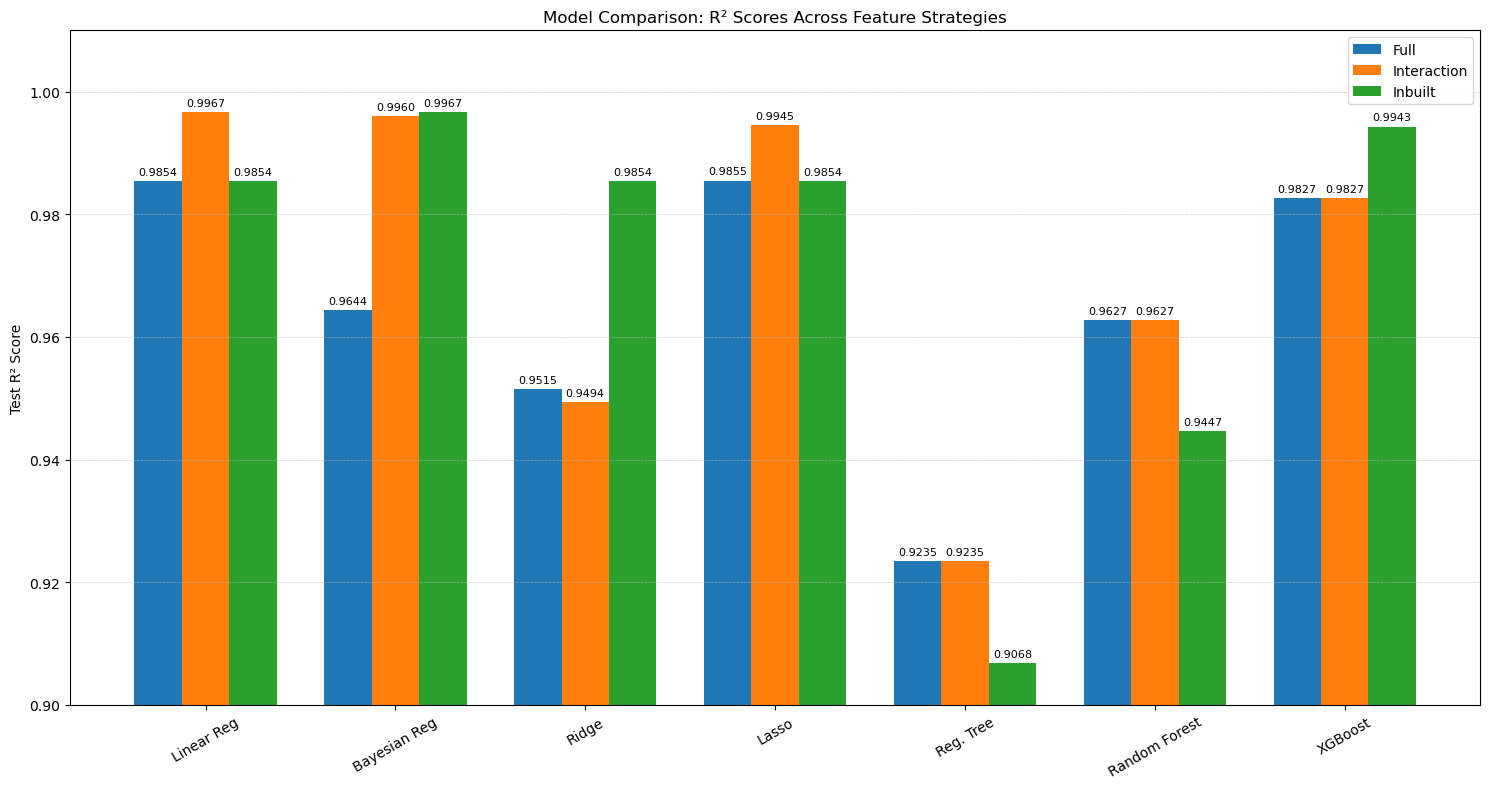

'/mnt/data/model_comparison_r2_scores.png'

In [16]:
import matplotlib.pyplot as plt
import numpy as np

# Models and their R² scores
models = [
    "Linear Reg", "Bayesian Reg", "Ridge", "Lasso",
    "Reg. Tree", "Random Forest", "XGBoost"
]

test_r2_full =  [0.9854, 0.9644, 0.9515, 0.9855, 0.9235, 0.9627, 0.9827]
test_r2_inter = [0.9967, 0.9960, 0.9494, 0.9945, 0.9235, 0.9627, 0.9827]
test_r2_inbuilt = [0.9854, 0.9967, 0.9854, 0.9854, 0.9068, 0.9447, 0.9943]

x = np.arange(len(models))  # label locations
width = 0.25  # width of bars

# Plotting
fig, ax = plt.subplots(figsize=(15, 8))
bars1 = ax.bar(x - width, test_r2_full, width, label='Full')
bars2 = ax.bar(x, test_r2_inter, width, label='Interaction')
bars3 = ax.bar(x + width, test_r2_inbuilt, width, label='Inbuilt')

# Labels and formatting
ax.set_ylabel('Test R² Score')
ax.set_title('Model Comparison: R² Scores Across Feature Strategies')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30)
ax.set_ylim(0.9, 1.01)
ax.legend()

# Annotate bars with values
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)
plt.show()
# Save the image
output_path = "/mnt/data/model_comparison_r2_scores.png"
plt.close()

output_path


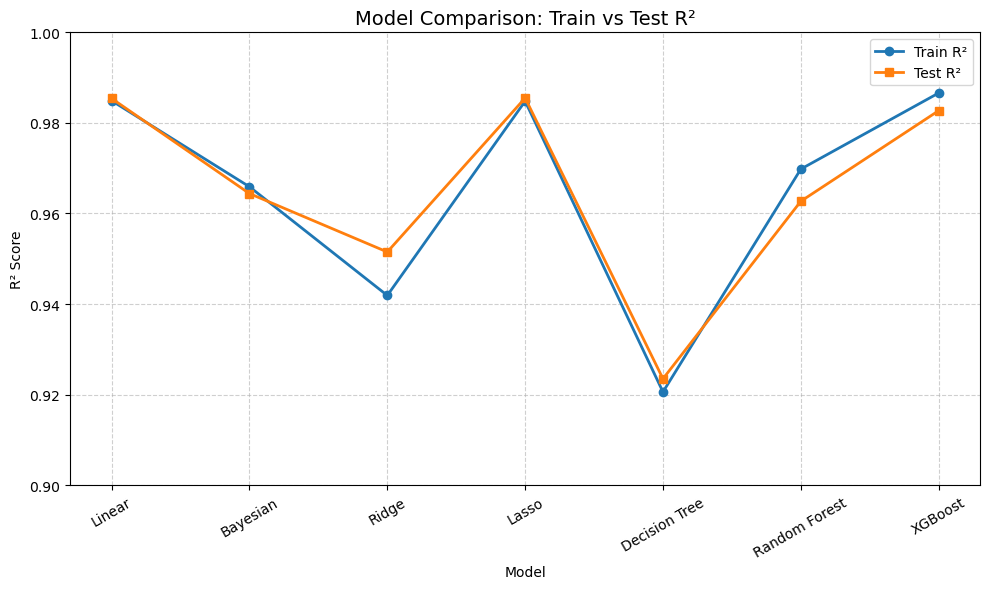

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Model names and their R² scores
models = [
    "Linear", "Bayesian", "Ridge", "Lasso",
    "Decision Tree", "Random Forest", "XGBoost"
]

train_r2 = [0.9849, 0.9659, 0.9419, 0.9848, 0.9206, 0.9698, 0.9866]
test_r2  = [0.9854, 0.9644, 0.9515, 0.9855, 0.9235, 0.9627, 0.9827]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(models, train_r2, marker='o', label='Train R²', linewidth=2)
plt.plot(models, test_r2, marker='s', label='Test R²', linewidth=2)

plt.xticks(rotation=30)
plt.title("Model Comparison: Train vs Test R²", fontsize=14)
plt.xlabel("Model")
plt.ylabel("R² Score")
plt.ylim(0.9, 1.0)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()

plt.show()
